<table align="left" width=100%>
    <tr>
        <td width="20%">
            <img src="faculty.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                  <b> Faculty Notebook <br> (Session 3) </b>
                </font>
            </div>
        </td>
    </tr>
</table>

## Table of Content

1. **[Import Libraries](#lib)**
2. **[Probability Distributions](#dist)**
     - 2.1 - **[Discrete Probability Distributions](#dis)**
         - 2.1.2 - **[Binomial Distribution](#binomial)**
         - 2.1.3 - **[Poisson Distribution](#poisson)**
     - 2.2 - **[Continuous Probability Distributions](#cont)**
         - 2.2.1 - **[Normal Distribution](#normal)**
3. **[Sampling](#sample)**
    - 3.1 - **[Simple Random Sample](#SRS)**
4. **[Central Limit Theorem (CLT)](#CLT)**
5. **[Parameter Estimation](#est)**
    - 5.1 - **[Point Estimation](#pt)**
        - 5.1.1 - **[Sampling Error](#err)**
    - 5.2 - **[Interval Estimation for Mean](#int)**
        - 5.2.1 - **[Large Sample Size](#large)**   
        - 5.2.2 - **[Small Sample Size](#small)**
    - 5.3 - **[Interval Estimation for Proportion](#prop)**

<a id="lib"></a>
# 1. Import Libraries

**Let us import the required libraries.**

In [1]:
# import 'pandas' 
import pandas as pd 

# import 'numpy' 
import numpy as np

# import subpackage of matplotlib
import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline

# import 'seaborn'
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# import 'factorial' from math library
from math import factorial

# import 'stats' package from scipy library
from scipy import stats
from scipy.stats import randint
from scipy.stats import skewnorm

# import 'random' to generate a random sample
import random

# import statistics to perform statistical computation  
import statistics

# import a library to perform Z-test
from statsmodels.stats import weightstats as stests

# to test the normality 
from scipy.stats import shapiro

# import the function to calculate the power of test
from statsmodels.stats import power

In [2]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

The study of statistics is mainly divided into two parts: `Descriptive` and `Inferential`.

Here we mainly focus on `Inferential Statistics`. Before that, let us recall the descriptive statistics methods learned as a part of exploratory data analysis.

<a id="dist"></a>
# 2. Probability Distributions

Probability distributions are used to understand and analyze the patterns in the data. It is a mathematical function that gives the probabilities of all the outcomes of an experiment. 

There are two types of probability distributions based on the type of random variable; discrete and continuous probability distributions.

<a id="dis"></a>
## 2.1 Discrete Probability Distributions

It is the probability distribution related to the discrete random variable. In this case, the `probability mass function (pmf)` gives the probability that a variable is equal to a specific value. For a discrete random variable `X`, pmf of X is given as $ P(X = x_{i})$, where $x_{i}$ for i = 1, 2, ..., n are the values taken by the variable X.

The sum of all the probabilities is always 1. i.e. $\sum_{i = 1}^{n} P(X = x_{i}) = 1$

For a discrete random variable X with values $x_{1}, x_{2}, ..., x_{n}$ the `cumulative distribution function (cdf)` is denoted by F(x) and defined as:

<p style='text-indent:25em'> <strong> $ F(x_{i}) = P[X \leq x_{i}]$</strong> </p>

The cdf of a random variable returns the probability that the variable takes all the values less than or equal to the specific value.

<a id="binomial"></a>
### 2.1.1 Binomial Distribution

A discrete variable X taking values 0, 1, 2,..., n follows a binomial distribution with parameters `n` and `p`, if the pmf of X is given by:

<p style='text-indent:25em'> <strong> $ P(X = x) = {n \choose x} p^{x}q^{n-x}$</strong> $\hspace{2cm}$  x = 0, 1, ..., n </p>

`p` denotes the probability of success of an experiment and `q` denotes the probability of failure. (where, p + q = 1)

If `n` independent bernoulli trials (each with `p` as probability of success) are executed then the number of successes follows a binomial distribution.

The mean and variance of the distribution is given as:<br>

Mean = $np$

Variance = $npq$ 

### Example:

#### 1. Heaven Furnitures (HF) sells furniture like sofas, beds and tables. It is observed that 25% of their customers complain about the furniture purchased by them for many reasons. On Tuesday, 20 customers purchased furniture products from HF. 

Consider a discrete random variable X representing the customer who purchased the furniture products. Here X follows binomial distribution with `n = 20, p = 0.25`. 

#### a. Calculate the probability that exactly 3 customers will complain about the purchased products.

In [3]:
# use 'binom.pmf()' to calculate the pmf for binomial distribution 
# pass the required value of customers to the parameter, 'k' 
# pass number of total customers to the parameter, 'n'
# here the success is the customer's complaint about the products with probability 0.25
prob = stats.binom.pmf(k = 3, n = 20, p = 0.25)

# use 'round()' to round-off the value to 2 digits
prob = round(prob, 2)
print('The probability that exactly 3 customers will complain about the purchased products is', prob)

The probability that exactly 3 customers will complain about the purchased products is 0.13


We plot a barplot to visualize the pmf of X.

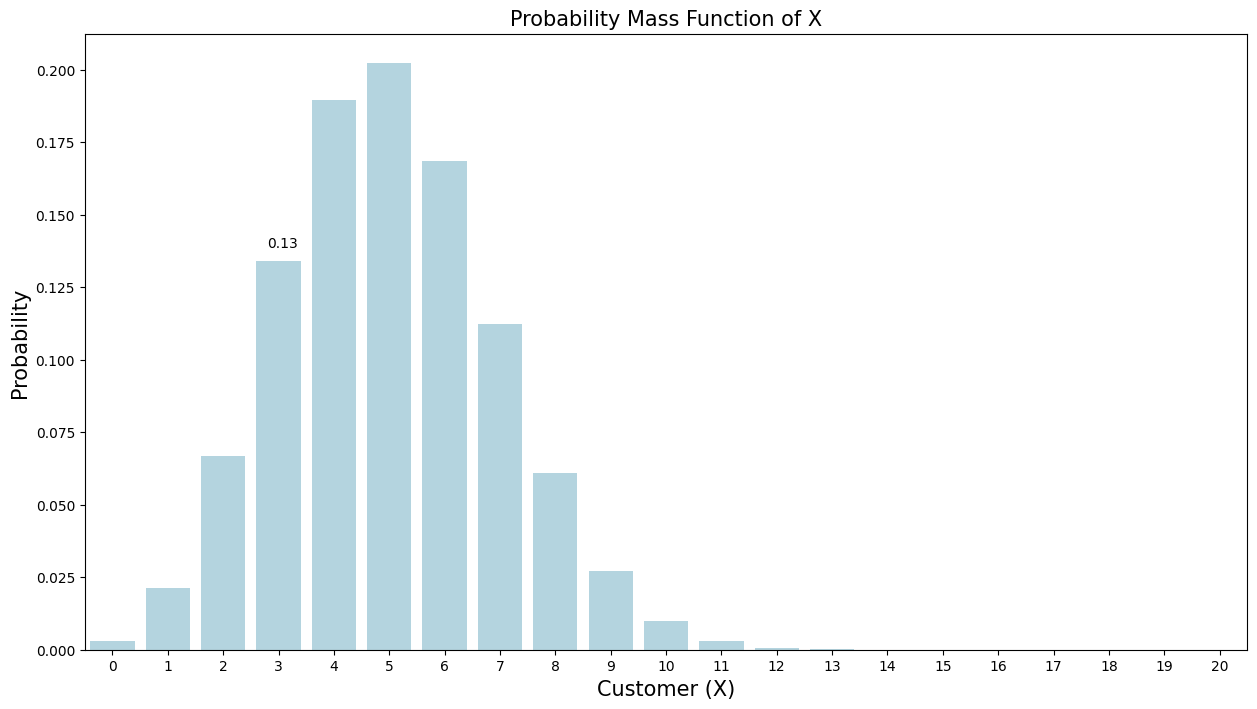

In [4]:
# the sample space of X 
X = np.arange(0,21)

# probability of success (customer complaint)
p = 0.25

# calculate pmf of X using 'binomial.pmf'
# pass the required value of customers to the parameter, 'k' 
# pass number of total customers to the parameter, 'n'
# here the success is the customer's complaint about the products with probability 0.25
binom_pmf = stats.binom.pmf(k = X, n = 20, p = 0.25)

# plot a barplot to display the pmf of X
# pass the r.v. X to the parameter, 'x'
# pass the corresponding list of probabilities to the parameter, 'y'
sns.barplot(x = X, y = binom_pmf, color = 'lightblue')

# use below code to print the value of P(X = 3) in the graph
# 'x' and 'y' gives position of the text
# 's' is the text 
plt.text(x = 2.8, y = binom_pmf[3]+0.005, s = round(binom_pmf[3], 2))

# set plot and axes labels
# set text size using 'fontsize'
plt.xlabel('Customer (X)', fontsize = 15)
plt.ylabel('Probability', fontsize = 15)
plt.title('Probability Mass Function of X', fontsize = 15)

# display the plot
plt.show()

####  b. Calculate the probability that more than 3 customers will complain about the furniture purchased by them.

In [5]:
# use 'binom.sf()' to calculate the value of survival function (1 - cdf). i.e. P(X > x)
# calculate the probability that more than 3 customers will complain
# pass the required value of customers to the parameter, 'k' 
# pass number of total customers to the parameter, 'n'
# here the success is the customer's complaint about the products with probability 0.25
prob = stats.binom.sf(k = 3, n = 20, p = 0.25)

# use 'round()' to round-off the value to 2 digits
req_prob = round(prob, 2)
print('The probability that more than 3 customers will complain about the furniture is', req_prob)

The probability that more than 3 customers will complain about the furniture is 0.77


#### 2. In a shooting academy, data was collected on the precision shooting of a student. From 15 shots fired 11 were on target. Consider the same student, what is the probability that out of 50 shots fired, exactly 35 will hit the target?

In [6]:
# use 'binom.pmf()' to calculate the pmf for binomial distribution 
# pass the required value of shots hit on the target to the parameter, 'k' 
# pass number of total shots fired to the parameter, 'n'
# here the success is hitting the shots on the target with probability 11/15
prob = stats.binom.pmf(k = 35, n = 50, p = 11/15)

# use 'round()' to round-off the value to 2 digits
prob = round(prob, 2)
print('The probability that that out of 50 shots fired, exactly 35 will hit the target is', prob)

The probability that that out of 50 shots fired, exactly 35 will hit the target is 0.11


<a id="poisson"></a>
### 2.1.2 Poisson Distribution

A discrete variable X taking values 0, 1, 2,... follows a poisson distribution with parameter `m` (m > 0), if the pmf of X is given by:

<p style='text-indent:25em'> <strong> $ P(X = x) = \frac{e^{-m}m^{x}}{x!}$</strong> $\hspace{2cm}$  x = 0, 1, 2,... </p>

The mean and variance of the distribution is given as:<br>

Mean = $m$ = Variance

**Note:** Consider a variable X that follows a binomial distribution with parameters `n` and `p`. If n$\rightarrow$$\infty$ and p$\rightarrow$0 then X follows a poison distribution with parameter `m = np`.

### Example:

**1. The number of pizzas sold per day by a food zone "Fapinos" follows a poisson distribution at a rate of 67 pizzas per day. Calculate the probability that the number of pizza sales exceeds 70 in a day.**

Consider a discrete random variable X representing the number of pizzas sold per day. Here X follows poisson distribution with `m = 67`. 

In [7]:
# use 'poisson.sf()' to calculate the value of survival function (1 - cdf). i.e. P(X > x)
# calculate the probability that more than 70 pizzas will be sold 
# pass the required value of pizzas to the parameter, 'k' 
# pass the average number of pizzas to the parameter, 'mu'
prob = stats.poisson.sf(k = 70, mu = 67)

# use 'round()' to round-off the value to 2 digits
req_prob = round(prob, 2)
print('The probability that the number of pizza sales exceeds 70 in a day is', req_prob)

The probability that the number of pizza sales exceeds 70 in a day is 0.33


We plot a distribution plot to visualize the cdf of X.

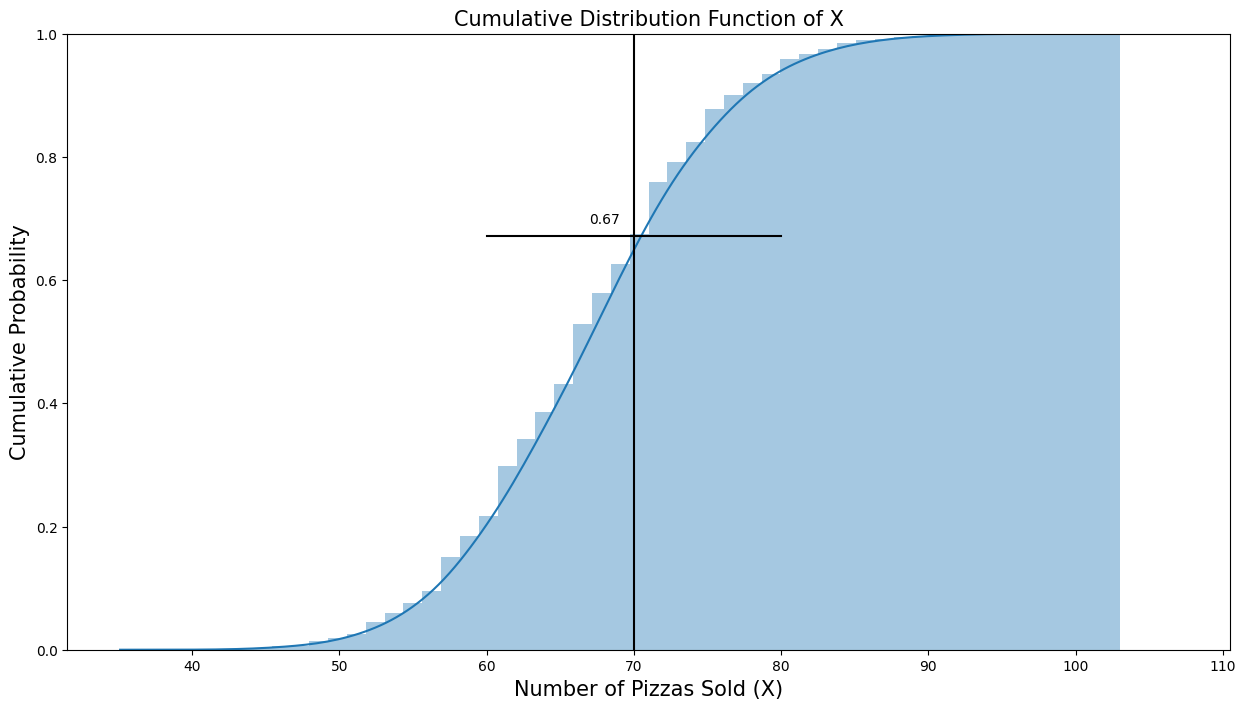

In [8]:
# consider a random variable 'X' that follows a poisson distribution with m = 67
# pass the average number of pizzas to the parameter, 'mu'
# pass the required number of observations to the parameter, 'size'
# set 'random_state' to obtain the same observations every time you run the code 
X = stats.poisson.rvs(mu = 67, size = 10000, random_state = 10)

# plot the cdf of X
# pass the data to the parameter, 'a'
# 'cumulative=True' in 'kde_kws' returns the cumulative kernel density estimator
# 'cumulative=True' in 'hist_kws' returns the cumulative histogram
sns.distplot(a = X, hist_kws = dict(cumulative=True), kde_kws = dict(cumulative=True))

# set the limit for y-axis
plt.ylim(0,1)

# plot a vertical line at X = 70
x, y = [70, 70], [0, 1]
plt.plot(x, y, color = 'black')

# plot a horizontal line corresponding to the value of cdf for X = 70
x, y = [60, 80], [stats.poisson.cdf(k = 70, mu = 67), stats.poisson.cdf(k = 70, mu = 67)]
plt.plot(x, y, color = 'black')

# use below code to print the value of P(X ≤ 70) in the graph
# 'x' and 'y' gives position of the text
# 's' is the text 
plt.text(x = 67, y = stats.poisson.cdf(k = 70, mu = 67)+0.02, s = round(stats.poisson.cdf(k = 70, mu = 67), 2))

# set plot and axes labels
# set text size using 'fontsize'
plt.xlabel('Number of Pizzas Sold (X)', fontsize = 15)
plt.ylabel('Cumulative Probability', fontsize = 15)
plt.title('Cumulative Distribution Function of X', fontsize = 15)

# display the plot
plt.show()

The value 0.67 in the graph corresponds to the P(X ≤ 70). In the example, we need to calculate P(X > 70). Thus, subtract 0.67 from 1 to get the required probability.

#### 2. The number of calls received at a telephone exchange in a day follows poisson distribution. The probability that the exchange receives 5 calls is three times that of the exchange receiving 10 calls. Obtain the average calls that the telephone exchange receives in a day.

In [9]:
# given: P(X = 5) = 3*P(X = 10)
# to find: m = average number of calls
# solving the above equation we get
m_raised_5 = factorial(10) / (3* factorial(5))

# value of 'm'
m = m_raised_5**(1/5)

# as the number of calls is an integer, convert the value of 'm' using int() 
print('Average calls that the telephone exchange receives in a day', int(m))

Average calls that the telephone exchange receives in a day 6


<a id="cont"></a>
## 2.2 Continuous Probability Distributions

It is the probability distribution related to the continuous random variable. The area under `probability density function (pdf)` gives the probability that a variable lies in a specific range. The value of pdf at a specific point is always 0.

Probability that X lies between [a,b] is given by:

<p style='text-indent:25em'> <strong> $P(a \leq X \leq b) = \int_{a}^{b} f(x) dx$</strong> </p> 

Area under the curve is 1. i.e. $\int_{-\infty}^{\infty} f(x) dx = 1$

For a continuous random variable X the `cumulative distribution function (cdf)` is denoted by F(x) and defined as:

<p style='text-indent:25em'> <strong> $ F(x) = \int_{-\infty}^{x} f(u) du$</strong> </p>

The cdf of a random variable returns the probability that the variable takes all the values less than or equal to the specific value.

<a id="normal"></a>
### 2.2.1 Normal Distribution

A continuous variable X follows a normal distribution with the parameters $\mu$ and $\sigma$ if the pdf of X is given by:

<p style='text-indent:25em'> <strong> $f(x) = \frac {1}{\sigma\sqrt(2 \pi)} e^\frac {-(x-\mu^2)}{2\sigma^2}$</strong></p>

The normal distribution is a bell-shaped symmetric distribution with `mean = median = mode`. 

The mean and variance of the distribution is given as:<br>

Mean = $\mu$ 

Variance = $\sigma^{2}$ 

**Note:** The variable Z given as, Z = $\frac{X - \mu}{\sigma}$ follows a `standard normal distribution` with mean 0 and variance 1.

### Example:

#### 1. A survey was conducted and it was found that the people spend their 300 minutes in a day surfing on online shopping sites on average and the corresponding standard deviation is 127 minutes. Assume that the time spent on surfing follows a normal distribution. Calculate the following probabilities:

Consider a continuous random variable X representing the time spent in surfing on online shopping sites. Here X follows a normal distribution with mean 300 and standard deviation as 127.


#### a. What is the probability that the users are spending less than or equal to 100 minutes per day?

In [10]:
# on average people spend 300 minutes everyday
avg = 300

# standard deviation is 127 minutes 
std = 127

# standardize the variable with x = 100
z = (100 - avg) / std

# 'cdf()' returns the P(Z <= z) i.e P(Z <= 100)
prob = stats.norm.cdf(z)

# use 'round()' to round-off the value to 2 digits
req_prob = round(prob, 2)
print('The probability that the users are spending less than or equal to 100 minutes daily is', req_prob)

The probability that the users are spending less than or equal to 100 minutes daily is 0.06


We plot a distribution plot to visualize the cdf of X.

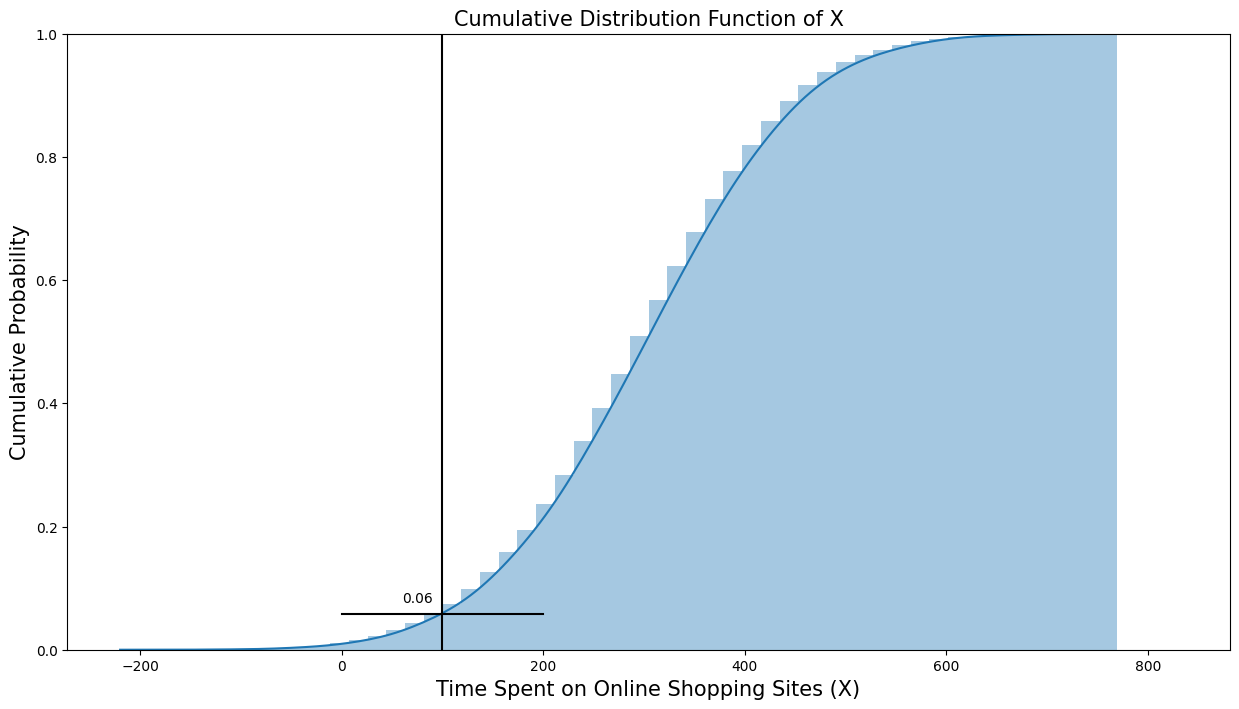

In [11]:
# consider a random variable 'X' that follows a normal distribution with mean 300 and standard deviation as 127
# pass the mean to the parameter, 'loc' 
# pass the standard deviation to the parameter, 'scale'
# pass the required number of observations to the parameter, 'size'
# set 'random_state' to obtain the same observations every time you run the code 
X = stats.norm.rvs(loc = 300, scale = 127, size = 10000, random_state = 10)

# plot the cdf of X
# pass the data to the parameter, 'a'
# 'cumulative=True' in 'kde_kws' returns the cumulative kernel density estimator
# 'cumulative=True' in 'hist_kws' returns the cumulative histogram
sns.distplot(a = X, hist_kws = dict(cumulative = True), kde_kws = dict(cumulative=True))

# set the limit for y-axis
plt.ylim(0,1)

# plot a vertical line at X = 100
x, y = [100, 100], [0, 1]
plt.plot(x, y, color = 'black')

# plot a horizontal line corresponding to the value of cdf for X = 100
x, y = [0, 200], [stats.norm.cdf(z), stats.norm.cdf(z)]
plt.plot(x, y, color = 'black')

# use below code to print the value of P(X ≤ 100) in the graph
# 'x' and 'y' gives position of the text
# 's' is the text 
plt.text(x = 60, y = stats.norm.cdf(z)+0.02, s = round(stats.norm.cdf(z), 2))

# set plot and axes labels
# set text size using 'fontsize'
plt.xlabel('Time Spent on Online Shopping Sites (X)', fontsize = 15)
plt.ylabel('Cumulative Probability', fontsize = 15)
plt.title('Cumulative Distribution Function of X', fontsize = 15)

# display the plot
plt.show()

The above plot returns the probability that the users are spending less than or equal to 100 minutes surfing  on online shopping sites.

#### b. What is the probability that people are spending more than 400 minutes on online shopping sites per day?

In [12]:
# on average people spend 300 minutes everyday
avg = 300

# standard deviation is 127 minutes 
std = 127

# standardize the variable with x = 400
z = (400 - avg) / std

# calculate the probability that people are spending more than 400 minutes of surfing per day
# 'sf()' returns the P(Z > z) i.e P(Z > 400)
prob = stats.norm.sf(z)

# use 'round()' to round-off the value to 2 digits
req_prob = round(prob, 2)
print('The probability that people are spending more than 400 minutes on online shopping sites per day is', req_prob)

The probability that people are spending more than 400 minutes on online shopping sites per day is 0.22


#### c. What is the probability that people are spending time between 250 minutes and 350 minutes per day?

In [13]:
# on average people spend 300 minutes everyday
avg = 300

# standard deviation is 127 minutes 
std = 127

# standardize the variable with x = 250
z_250 = (250 - avg) / std

# 'cdf()' returns the P(Z <= z) i.e P(Z <= 250)
p_250 = stats.norm.cdf(z_250)

# standardize the variable with x = 350
z_350 = (350 - avg) / std

# 'cdf()' returns the P(Z <= z) i.e P(Z <= 350)
p_350 = stats.norm.cdf(z_350)

# calculate the difference between 'p_350' and 'p_250' to find the required probability
prob = p_350 - p_250

# use 'round()' to round-off the value to 2 digits
req_prob = round(prob, 2)
print('The probability that people are spending time between 250 minutes and 350 minutes per day is', req_prob)

The probability that people are spending time between 250 minutes and 350 minutes per day is 0.31


#### 2. A monthly balance in the bank account of a credit card holders is assumed to be normally distributed with mean 500 dollars and variance 100 dollars. What is the probability that the balance can be more than 513.5 dollars?

In [14]:
# average account balance
avg = 500

# variance is 100 dollars
var = 100

# standard deviation is square-root of variance  
std = np.sqrt(var)

# standardize the variable with x = 513.5
z = (513.5 - avg) / std

# calculate the probability that the balance is more than 513.5 dollars
# 'sf()' returns the P(Z > z) i.e P(Z > 513.5)
prob = stats.norm.sf(z)

# use 'round()' to round-off the value to 4 digits
req_prob = round(prob, 4)
print('The probability that the balance can be more than 513.5 dollars is', req_prob)

The probability that the balance can be more than 513.5 dollars is 0.0885


<a id="sample"></a>
# 3. Sampling

It is the method of selecting a subset of observations from the population which is used as a representative of the population.

The value associated with the characteristic of the population is known as a `parameter` and the characteristic of the sample is described by a `statistic`. The sample from a population is used to estimate the values of parameters.

Different types of sampling: Simple Random, Stratified, Systematic, and Cluster sampling.

<a id="SRS"></a>
## 3.1 Simple Random Sample

It is one of the sampling methods in which each observation in the population has an equal chance (probability) of being selected as the sample. It is the most basic type of sampling.

Simple random sampling can be done with/without replacement.

In Simple Random Sampling With Replacement (`SRSWR`) an observation can occur multiple times, as we replace the selected observation in the population before drawing the next sample. In this technique, the size of the population always remains the same. <br>
If there are `N` observations in the population then the probability of drawing `n` samples with replacement is $\frac{1}{N^{n}}$

### Example:

#### 1. Consider 8 identical boxes that contain different number of shuttlecocks. Draw a sample of 20 boxes with replacement.

data = [18, 13, 16, 17, 15, 21, 19, 12]

In [15]:
# given population
data = [18, 19, 16, 17, 15, 21, 19, 12]

# pass the data to the parameter, 'population'
# pass the required sample size to the parameter, 'k' 
sample_wr = random.choices(population = data, k = 20)

# print the sample
print('Sample with replacement:', sample_wr)

Sample with replacement: [15, 19, 19, 19, 16, 12, 17, 19, 16, 19, 17, 18, 18, 19, 19, 15, 17, 12, 17, 16]


In Simple Random Sampling Without Replacement (`SRSWOR`) an observation can occur only once as we do not replace the selected observation before drawing the next sample. <br>
If there are `N` observations in the population then the probability of drawing `n` samples without replacement is $\frac{1}{N \choose n}$

### Example:

#### 1.  An ice-cream manufacturer wants to study the sales of ice-creams to decide the production policies of the company. He collects the data for the number of ice-creams sold in a month from the 30 franchise. Randomly select the sales of 10 franchise for the study. 

data = [21, 93, 62, 76, 73, 20, 56, 95, 41, 36, 38, 13, 80, 88, 34, 18, 40, 11, 25, 29, 61, 23, 82, 10, 92, 69, 60, 87, 14, 91]

In [16]:
# given population
data = [21, 93, 62, 76, 73, 20, 56, 95, 41, 36, 38, 13, 80, 88, 34, 18, 40, 11, 25, 29, 61, 23, 82, 10, 92, 69, 60, 87, 14, 91]

# pass the data to the parameter, 'population'
# pass the required sample size to the parameter, 'k' 
sample_wor = random.sample(population = data, k = 10)

# print the sample
print('Sample without replacement:', sample_wor)

Sample without replacement: [14, 60, 61, 20, 93, 21, 11, 34, 95, 92]


<a id="CLT"></a>
# 4. Central Limit Theorem

Let $X_{1}, X_{2}, X_{3},..., X_{n}$ be the random sample drawn from a population with mean $\mu$ and standard deviation $\sigma$. The central limit theorem states that, for sufficiently large n, the sample mean $\overline{X}$ follows an approximately normal distribution with mean $\mu$ and standard deviation $\frac{\sigma}{\sqrt{n}}$.

i.e. $\frac{\overline{X} - \mu}{\frac{\sigma}{\sqrt{n}}}$ follows a standard normal distribution.

For a normally distributed population, the above result holds for any sample size.

For the population with distribution other than normal, generally, the sample size greater than or equal to 30 is considered as the large sample size.

Let us plot some graphs to demonstrate the CLT for positive, negative and normal population distribution.

In [17]:
# define a function to obtain the sample means for given population
# pass the population and and number of samples as the input parameters
def sample_mean_calculator(population_array, n_samples):
    
    # create an empty list to store the means of each sample
    sample_means = []
    for i in range(n_samples):
       
        # generates a random sample of size 500 from a given array or a list
        sample = np.random.choice(population_array, size=500, replace=False)
        
        # calculate the mean of the sample data
        sample_mean = np.mean(sample)
        
        # append the mean to the list
        sample_means.append(sample_mean)    
        
    return sample_means

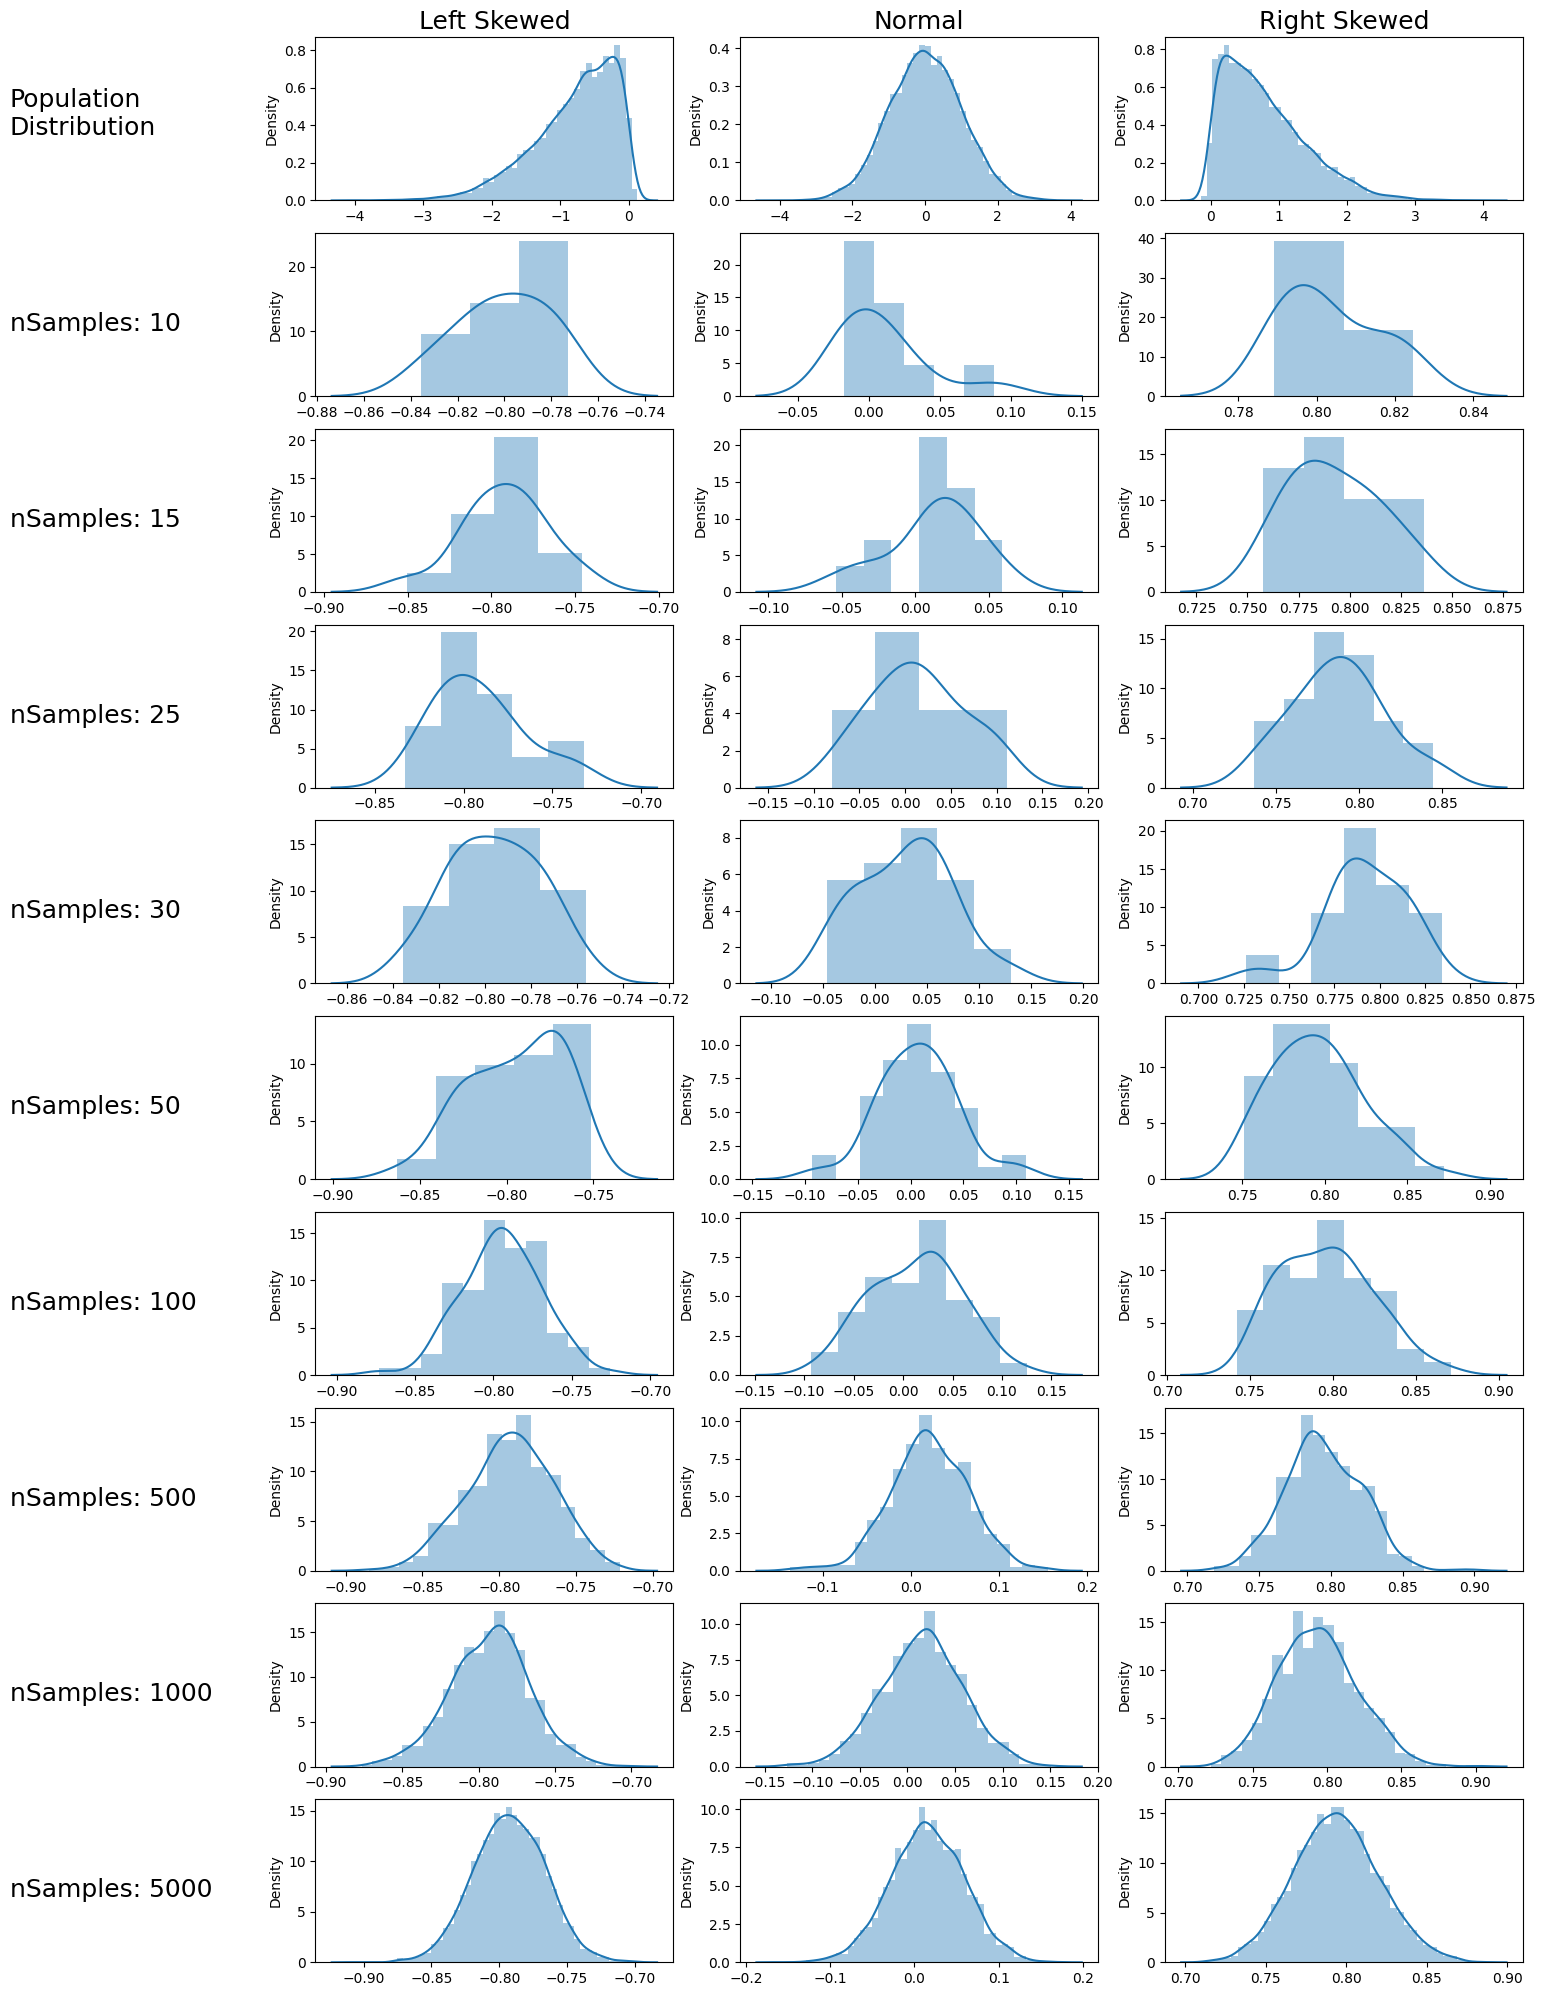

In [18]:
# set the plot size
plt.rcParams["figure.figsize"] = [25,25]

# divide the plot into the specified number of subplots 
gs = gridspec.GridSpec(10, 5, width_ratios=[2, 3, 3, 3, 3], height_ratios=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# generate a left skewed data
lskew_population = skewnorm.rvs(-20, size=10000, random_state = 1)
# plot a distribution plot
sns.distplot(lskew_population, kde=False)

# generate a normally distributed data
normal_population = skewnorm.rvs(0, size = 10000, random_state = 1)
# plot a distribution plot
sns.distplot(normal_population, kde=False)

# generate a right skewed data
rskew_population = skewnorm.rvs(20, size=10000, random_state = 1)
# plot a distribution plot
sns.distplot(rskew_population, kde=False)

# for the text
t1 = plt.subplot(gs[0, 0])
t1.text(0.0, 0.4, s=str("Population\nDistribution"), fontsize=18)
t1.axis('off')

# for left skewed population
a1 = plt.subplot(gs[0, 1])
a1.set_title("Left Skewed", fontsize=18)
a1 = sns.distplot(lskew_population)

# for normal distribution population
b1 = plt.subplot(gs[0, 2])
b1.set_title("Normal", fontsize=18)
b1 = sns.distplot(normal_population)

# for right skewed population
c1 = plt.subplot(gs[0, 3])
c1.set_title("Right Skewed", fontsize=18)
c1 = sns.distplot(rskew_population)

## Number of samples: 10
# for the text
t2 = plt.subplot(gs[1, 0])
t2.text(0.0, 0.4, s=str("nSamples: 10"), fontsize=18)
t2.axis('off')

# for left skewed population sample
a2 = plt.subplot(gs[1, 1])
a2 = sns.distplot(sample_mean_calculator(lskew_population, 10))

# for normal distribution population sample
b2 = plt.subplot(gs[1, 2])
b2 = sns.distplot(sample_mean_calculator(normal_population, 10))

# for right skewed population sample
c2 = plt.subplot(gs[1, 3])
c2 = sns.distplot(sample_mean_calculator(rskew_population, 10))


## Number of samples: 15
# for the text
t3 = plt.subplot(gs[2, 0])
t3.text(0.0, 0.4, s=str("nSamples: 15"), fontsize=18)
t3.axis('off')

# for left skewed population sample
a3 = plt.subplot(gs[2, 1])
a3 = sns.distplot(sample_mean_calculator(lskew_population, 15))

# for normal distribution population sample
b3 = plt.subplot(gs[2, 2])
b3 = sns.distplot(sample_mean_calculator(normal_population, 15))

# for right skewed population sample
c3 = plt.subplot(gs[2, 3])
c3 = sns.distplot(sample_mean_calculator(rskew_population, 15))


## Number of samples: 25
# for the text
t4 = plt.subplot(gs[3, 0])
t4.text(0.0, 0.4, s=str("nSamples: 25"), fontsize=18)
t4.axis('off')

# for left skewed population sample
a4 = plt.subplot(gs[3, 1])
a4 = sns.distplot(sample_mean_calculator(lskew_population, 25))

# for normal distribution population sample
b4 = plt.subplot(gs[3, 2])
b4 = sns.distplot(sample_mean_calculator(normal_population, 25))

# for right skewed population sample
c4 = plt.subplot(gs[3, 3])
c4 = sns.distplot(sample_mean_calculator(rskew_population, 25))


## Number of samples: 30
# for the text
t5 = plt.subplot(gs[4, 0])
t5.text(0.0, 0.4, s=str("nSamples: 30"), fontsize=18)
t5.axis('off')

# for left skewed population sample
a5 = plt.subplot(gs[4, 1])
a5 = sns.distplot(sample_mean_calculator(lskew_population, 30))

# for normal distribution population sample
b5 = plt.subplot(gs[4, 2])
b5 = sns.distplot(sample_mean_calculator(normal_population, 30))

# for right skewed population sample
c5 = plt.subplot(gs[4, 3])
c5 = sns.distplot(sample_mean_calculator(rskew_population, 30))


## Number of samples: 50
# for the text
t6 = plt.subplot(gs[5, 0])
t6.text(0.0, 0.4, s=str("nSamples: 50"), fontsize=18)
t6.axis('off')

# for left skewed population sample
a6 = plt.subplot(gs[5, 1])
a6 = sns.distplot(sample_mean_calculator(lskew_population, 50))

# for normal distribution population sample
b6 = plt.subplot(gs[5, 2])
b6 = sns.distplot(sample_mean_calculator(normal_population, 50))

# for right skewed population sample
c6 = plt.subplot(gs[5, 3])
c6 = sns.distplot(sample_mean_calculator(rskew_population, 50))


## Number of samples: 100
# for the text
t7 = plt.subplot(gs[6, 0])
t7.text(0.0, 0.4, s=str("nSamples: 100"), fontsize=18)
t7.axis('off')

# for left skewed population sample
a7 = plt.subplot(gs[6, 1])
a7 = sns.distplot(sample_mean_calculator(lskew_population, 100))

# for normal distribution population sample
b7 = plt.subplot(gs[6, 2])
b7 = sns.distplot(sample_mean_calculator(normal_population, 100))

# for right skewed population sample
c7 = plt.subplot(gs[6, 3])
c7 = sns.distplot(sample_mean_calculator(rskew_population, 100))


## Number of samples: 500
# for the text
t8 = plt.subplot(gs[7, 0])
t8.text(0.0, 0.4, s=str("nSamples: 500"), fontsize=18)
t8.axis('off')

# for left skewed population sample
a8 = plt.subplot(gs[7, 1])
a8 = sns.distplot(sample_mean_calculator(lskew_population, 500))

# for normal distribution population sample
b8 = plt.subplot(gs[7, 2])
b8 = sns.distplot(sample_mean_calculator(normal_population, 500))

# for right skewed population sample
c8 = plt.subplot(gs[7, 3])
c8 = sns.distplot(sample_mean_calculator(rskew_population, 500))


## Number of samples: 1000
# for the text
t9 = plt.subplot(gs[8, 0])
t9.text(0.0, 0.4, s=str("nSamples: 1000"), fontsize=18)
t9.axis('off')

# for left skewed population sample
a9 = plt.subplot(gs[8, 1])
a9 = sns.distplot(sample_mean_calculator(lskew_population, 1000))

# for normal distribution population sample
b9 = plt.subplot(gs[8, 2])
b9 = sns.distplot(sample_mean_calculator(normal_population, 1000))

# for right skewed population sample
c9 = plt.subplot(gs[8, 3])
c9 = sns.distplot(sample_mean_calculator(rskew_population, 1000))


## Number of samples: 5000
# for the text
t10 = plt.subplot(gs[9, 0])
t10.text(0.0, 0.4, s=str("nSamples: 5000"), fontsize=18)
t10.axis('off')

# for left skewed population sample
a10 = plt.subplot(gs[9, 1])
a10 = sns.distplot(sample_mean_calculator(lskew_population, 5000))

# for normal distribution population sample
b10 = plt.subplot(gs[9, 2])
b10 = sns.distplot(sample_mean_calculator(normal_population, 5000))

# for right skewed population sample
c10 = plt.subplot(gs[9, 3])
c10 = sns.distplot(sample_mean_calculator(rskew_population, 5000))

<a id="est"></a>
# 5. Parameter Estimation

The value associated with the characteristic of the population is known as a `parameter` and the characteristic of the sample is described by a `statistic`.
Usually, the population parameters are not known in most of the real-life problems. Thus, we consider a subset of the population (sample) to estimate the population parameter using a sample statistic.

`Point estimation` and `Interval estimation` are two of the methods to estimate the population parameter.

<a id="pt"></a>
## 5.1 Point Estimation

This method considers a single value (sample statistic) as the population parameter. 

Let $X_{1}, X_{2}, X_{3},..., X_{n}$ be the random sample drawn from a population with mean $\mu$ and standard deviation $\sigma$. <br>
The point estimation method estimates the population mean, $\mu = \overline{X}$, where $\overline{X}$ is the sample mean and population standard deviation, $\sigma = s$, where $s$ is the standard deviation of the sample (`Standard Error`).

### Example:

#### 1. Consider the data of grade points for 35 students in a data science course. Select grades of 20 students randomly from the data and find the point estimate for the population mean.

     Grades: [59.1, 65.0, 75.8, 79.2, 95.0, 99.8, 89.1, 65.2, 41.9, 55.2, 94.8, 84.1, 83.2, 74.0, 75.5, 76.2, 79.1, 80.1, 
              92.1, 74.2, 59.2, 64.0, 75, 78.2, 95.6, 97.8, 89.5, 64.2, 41.8, 57.2, 85, 91.4, 81.8, 74.6, 90]

In [19]:
# given population
grades = [59.1, 65.0, 75.8, 79.2, 95.0, 99.8, 89.1, 65.2, 41.9, 55.2, 94.8, 84.1, 83.2, 74.0, 75.5, 76.2, 79.1, 80.1, 
          92.1, 74.2, 59.2, 64.0, 75, 78.2, 95.6, 97.8, 89.5, 64.2, 41.8, 57.2, 85, 91.4, 81.8, 74.6, 90]

# draw a sample for grades of 18 students without replacement
# set a random seed to get the same sample each time you run the code
random.seed(1)

# pass the data to the parameter, 'population'
# pass the required sample size to the parameter, 'k' 
samp_grades = random.sample(population = grades, k = 20)

# the point estimate for the population mean is equal to 'sample mean'
# calculate the sample mean
samp_mean = np.mean(samp_grades)

print('The point estimate for the population mean is', samp_mean)

The point estimate for the population mean is 75.32500000000002


Let us visualize the point estimate of the population mean.

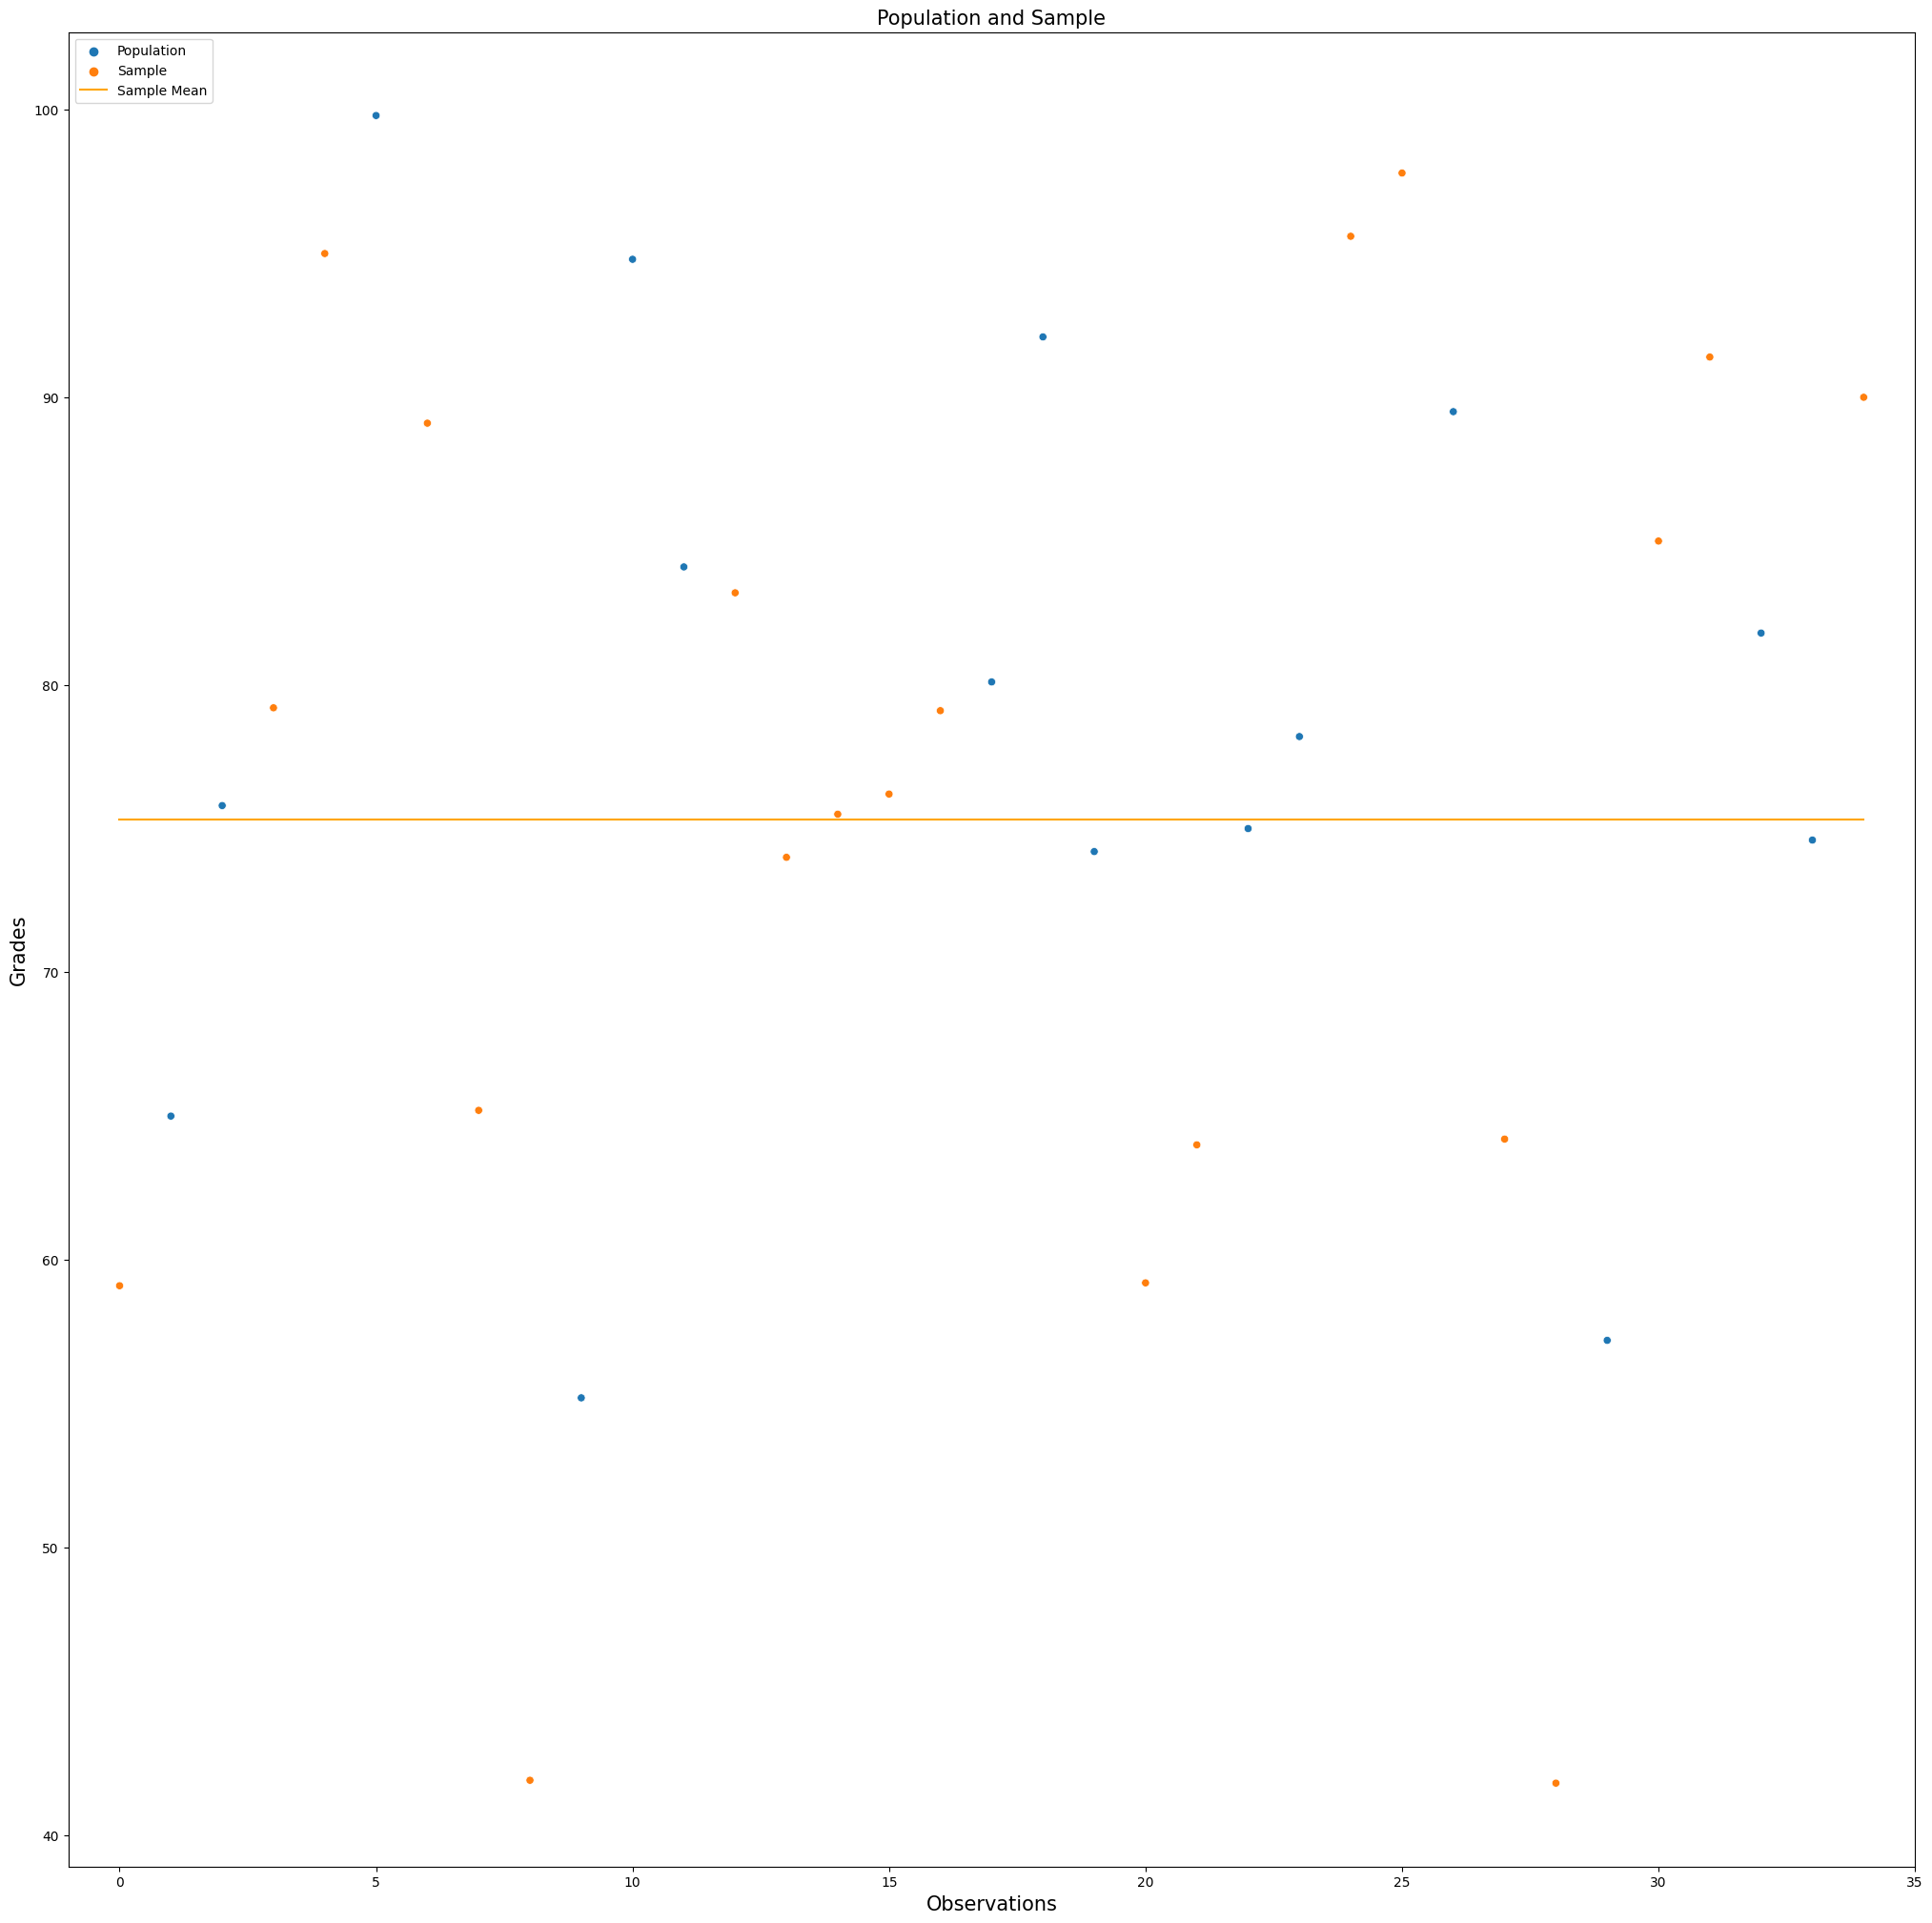

In [20]:
# create dataframes using dictionaries to store population
df_pop = pd.DataFrame(dict(Observation = grades, Category = 'Population'))

# use for loop and if condition to assign the category 'Sample' to all the points in the sample
for i in df_pop['Observation']:
    if i in samp_grades:
        df_pop['Category'][df_pop.Observation == i] = 'Sample'

# plot the scatter plot of population
# pass the indices of population to the parameter, 'x'
# pass the observations to the parameter, 'y'
# pass the label for the representation of population points to the parameter, 'label'
# pass the variable 'Category' in the dataframe to the parameter, 'hue'
# pass hte required order of the levels in the 'hue' variable to the parameter, 'hue_order'
sns.scatterplot(x = np.arange(0, len(grades)), y = grades, hue = df_pop['Category'], hue_order = ['Population', 'Sample'])

# plot a horizontal line at sample mean 
x, y = [0, 34], [samp_mean, samp_mean]
plt.plot(x, y, color = 'orange', label = 'Sample Mean')

# set the limit for x-axis
plt.xlim(-1, 35)

# add legend to the plot
# pass the required position of legend to the parameter, 'loc'
plt.legend(loc = 'upper left')

# set plot and axes labels
# set text size using 'fontsize'
plt.xlabel('Observations', fontsize = 15)
plt.ylabel('Grades', fontsize = 15)
plt.title('Population and Sample', fontsize = 15)

# display the plot
plt.show()

#### 2. A financial firm has created 50 portfolios. From them, a sample of 13 portfolios was selected, out of which 8 were found to be underperforming. Can you estimate the number of underperforming portfolios?

In [21]:
# total count of portfolios
N = 50

# number of portfolios in a sample
n = 13

# number of underperforming portfolios in a sample
x = 8

# sample proportion
p_samp = x/n

# estimate the number of underperforming portfolios
num_port = p_samp*N

# round the number to get an integer value
print('The number of underperforming portfolios:', round(num_port))

The number of underperforming portfolios: 31


<a id="err"></a>
### 5.1.1 Sampling Error

Sampling error is considered as the absolute difference between the sample statistic used to estimate the parameter and the corresponding population parameter. Since the entire population is not considered as the sample, the values of mean, median, quantiles, and so on calculated on sample differ from the actual population values. 

One can reduce the sampling error either by increasing the sample size or determining the optimal sample size using various methods.

### Example:

#### 1. Consider the data for the number of ice-creams sold per day. An ice-cream vendor collected this data for 90 days and then a sample is drawn (without replacement) containing ice-creams sold for 25 days. 

data = [21, 93, 62, 76, 73, 20, 56, 95, 41, 36, 38, 13, 80, 88, 34, 18, 40, 11, 
        25, 29, 61, 23, 82, 10, 92, 69, 60, 87, 14, 91, 94, 49, 57, 83, 96, 55, 
        79, 52, 59, 39, 58, 17, 19, 98, 15, 54, 48, 46, 72, 45, 65, 28, 37, 30, 
        68, 75, 16, 33, 31, 99, 22, 51, 27, 67, 85, 47, 44, 77, 64, 97, 84, 42, 
        90, 70, 74, 89, 32, 26, 24, 12, 81, 53, 50, 35, 71, 63, 43, 86, 78, 66]
        
sample = [10, 22, 47, 66, 11, 57, 77, 98, 31, 63, 74, 84, 50, 96, 88, 92, 70, 54, 65, 44, 16, 72, 20, 90, 43]

Comupte the sampling error for mean.

In [22]:
# given population
data = [21, 93, 62, 76, 73, 20, 56, 95, 41, 36, 38, 13, 80, 88, 34, 18, 40, 11, 25, 29, 61, 23, 82, 10, 92, 69, 60, 87, 14, 91,
        94, 49, 57, 83, 96, 55, 79, 52, 59, 39, 58, 17, 19, 98, 15, 54, 48, 46, 72, 45, 65, 28, 37, 30, 68, 75, 16, 33, 31, 99, 
        22, 51, 27, 67, 85, 47, 44, 77, 64, 97, 84, 42, 90, 70, 74, 89, 32, 26, 24, 12, 81, 53, 50, 35, 71, 63, 43, 86, 78, 66]

# given sample
sample = [10, 22, 47, 66, 11, 57, 77, 98, 31, 63, 74, 84, 50, 96, 88, 92, 70, 54, 65, 44, 16, 72, 20, 90, 43]

# calculate the point estimate for the population mean
samp_mean = np.mean(sample)

# population mean
pop_mean = np.mean(data)

# calculate the sampling error for mean
print("Sampling error for mean:", np.abs(samp_mean - pop_mean))

Sampling error for mean: 3.1000000000000014


Let us visualize the sampling error for mean.

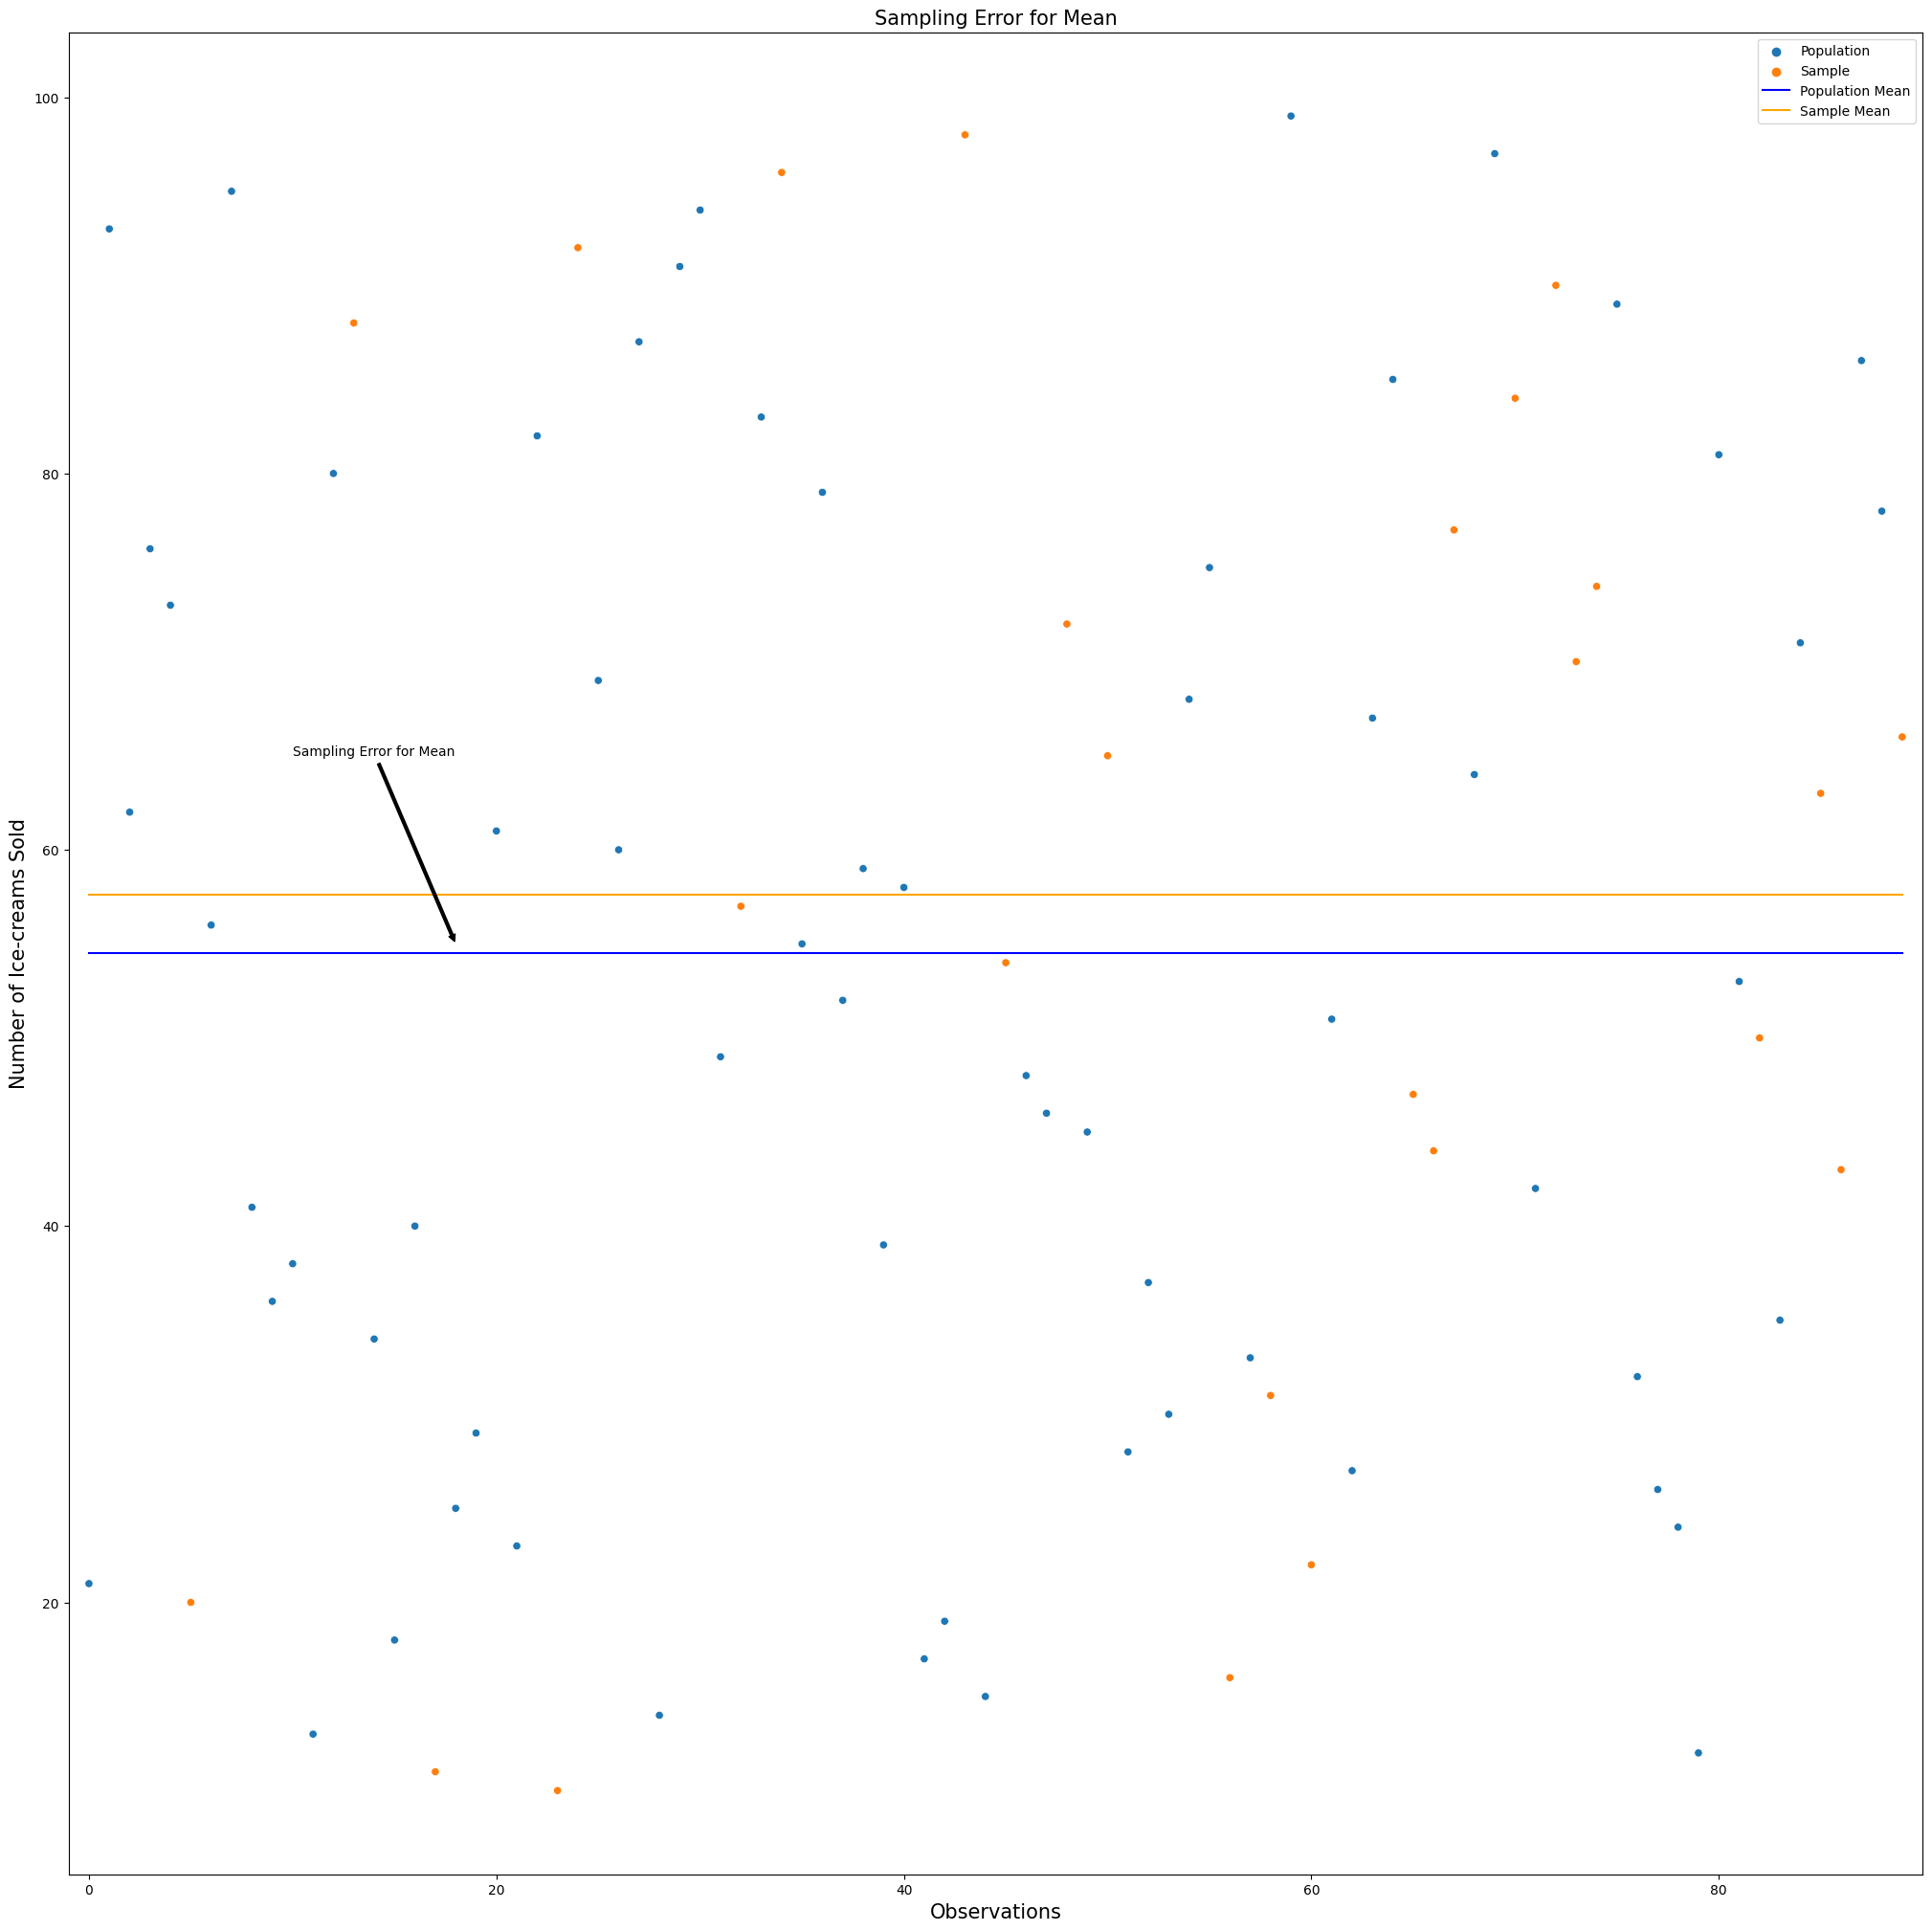

In [23]:
# create dataframes using dictionaries to store population
df_pop = pd.DataFrame(dict(Observation = data, Category = 'Population'))

# use for loop and if condition to assign the category 'Sample' to all the points in the sample
for i in df_pop['Observation']:
    if i in sample:
        df_pop['Category'][df_pop.Observation == i] = 'Sample'

# plot the scatter plot of population
# pass the indices of population to the parameter, 'x'
# pass the observations to the parameter, 'y'
# pass the label for the representation of population points to the parameter, 'label'
# pass the variable 'Category' in the dataframe to the parameter, 'hue'
# pass hte required order of the levels in the 'hue' variable to the parameter, 'hue_order'
ax = sns.scatterplot(x = np.arange(0, len(data)), y = data, hue = df_pop['Category'], hue_order = ['Population', 'Sample'])

# plot a horizontal line at population mean 
x, y = [0, 89], [pop_mean, pop_mean]
plt.plot(x, y, color = 'blue', label = 'Population Mean')

# plot a horizontal line at sample mean 
x, y = [0, 89], [samp_mean, samp_mean]
plt.plot(x, y, color = 'orange', label = 'Sample Mean')

# use 'annonate' function to draw an arrow between points xy and xytext
# 's' is a argument to write text
# we can change the facecolor and arrowstyle; this is only for representation purpose
plt.annotate(text = 'Sampling Error for Mean', xy = (18, 55), xytext = (10, 65), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

# set the limit for x-axis
plt.xlim(-1, 90)

# add legend to the plot
plt.legend()

# set plot and axes labels
# set text size using 'fontsize'
plt.xlabel('Observations', fontsize = 15)
plt.ylabel('Number of Ice-creams Sold', fontsize = 15)
plt.title('Sampling Error for Mean', fontsize = 15)

# display the plot
plt.show()

<a id="int"></a>
## 5.2 Interval Estimation for Mean

This method considers the range of values in which the population parameter is likely to lie. The confidence interval is an interval that describes the range of values in which the parameter lies with a specific probability. It is given by the formula,<br> <p style='text-indent:20em'> `conf_interval = sample statistic ± margin of error`</p>

The uncertainty of an estimate is described by the `confidence level` which is used to calculate the margin of error. 

<a id="large"></a>
### 5.2.1 Large Sample Size

Consider a population with mean $\mu$ and standard deviation $\sigma$. Let us take a sample of `n` observations from the population such that, $n \geq 30$. The central limit theorem states that the sampling distribution of mean follows a normal distribution with mean $\mu$ and standard deviation $\frac{\sigma}{\sqrt(n)}$.

The confidence interval for the population mean with $100(1-\alpha)$% confidence level is given as: $\overline{X} \pm Z_{\frac{\alpha}{2}}\frac{\sigma}{\sqrt{n}}$

Where, <br>
$\overline{X}$: Sample mean<br>
$\alpha$: Level of significance<br>
$\sigma$: Population standard deviation<br>
$n$: Sample size

The quantity $\frac{\sigma}{\sqrt{n}}$ is the standard error of the mean. And the margin of error is given by $Z_{\frac{\alpha}{2}}\frac{\sigma}{\sqrt{n}}$.

If we know the expected margin of error (ME), then we can calculate the required sample size (n) using the formula: $n = (Z_{\frac{\alpha}{2}})^{2}\frac{\sigma^{2}}{ME^{2}}$.
 
The above equation is valid for any population provided the sample size is sufficiently large (usually $n \geq 30$). Relace $\sigma$ by the standard deviation of the sample ($s$) if the population standard deviation is not known.

The value of $Z_{\frac{\alpha}{2}}$ for different $\alpha$ values can be obtained using the `stats.norm.isf()` from the scipy library. 

In [24]:
# let us find the Z-values for different alpha values

# create an empty dataframe to store the alpha and corresponding Z-value
df_Z = pd.DataFrame()

# create a dictionary of different alpha values
alpha =  [0.1, 0.05, 0.02, 0.01] 

# use for loop to calculate the value for each alpha
for i in range(len(alpha)):
    alpha_by_2 = alpha[i] / 2
    
    # use 'stats.norm.isf()' to find the Z-value corresponding to the upper tail probability 'q'
    # pass the value of 'alpha_by_2' to the parameter 'q'
    # use 'round()' to round-off the value to 4 digits
    Z = np.abs(round(stats.norm.isf(q = alpha_by_2), 4))
    
    # create a dataframe using dictionary to store the alpha and corresponding Z-value
    # set the loop iterator 'i' as the index of the dataframe
    row =  pd.DataFrame({"alpha": alpha[i], "Z_alpha_by_2" : Z}, index = [i])
    
    # append the row to the dataframe 'df_Z'
    df_Z = df_Z.append(row)

# print the final dataframe
df_Z

,alpha,Z_alpha_by_2
0,0.10,1.6449
1,0.05,1.9600
2,0.02,2.3263
3,0.01,2.5758


To calculate the confidence interval with 95% confidence, use the Z-value corresponding to `alpha = 0.05`. 

### Example:

#### 1. A random sample of weight (in kg.) for 35 diabetic patients is drawn from the population with a standard deviation of 8 kg. Find the 90% confidence interval for the population mean.

    Weight: [59.1, 65.0, 75.8, 79.2, 95.0, 99.8, 89.1, 65.3, 41.9, 55.2, 94.8, 84.1, 83.2, 74.0, 75.5, 76.2, 79.1, 80.1, 
             92.1, 74.2, 59.2, 64.0, 75, 78.2, 95.6, 97.8, 89.5, 64.2, 41.8, 57.2, 85, 91.4, 81.8, 74.6, 90]

In [25]:
# given sample
weight = [59.1, 65.0, 75.8, 79.2, 95.0, 99.8, 89.1, 65.3, 41.9, 55.2, 94.8, 84.1, 83.2, 74.0, 75.5, 76.2, 79.1, 80.1, 
          92.1, 74.2, 59.2, 64.0, 75, 78.2, 95.6, 97.8, 89.5, 64.2, 41.8, 57.2, 85, 91.4, 81.8, 74.6, 90]

# number of observations in sample
n = len(weight)

# given population standard deviation
std_pop = 8

# calculate the 90% confidence interval
# pass the sample mean to the parameter, 'loc'
# pass the scaling factor (std_pop / n^(1/2)) to the parameter, 'scale'
interval = stats.norm.interval(0.90, loc = np.mean(weight), scale = std_pop / np.sqrt(n))

# print the 90% confidence interval
# use 'round()' to round-off the value to 2 digits
print('The 90% confidence interval of population mean is', np.round(interval,2))

The 90% confidence interval of population mean is [74.46 78.91]


#### Let us calculate the confidence interval without using the built-in function.

In [26]:
# given sample
weight = [59.1, 65.0, 75.8, 79.2, 95.0, 99.8, 89.1, 65.2, 41.9, 55.2, 94.8, 84.1, 83.2, 74.0, 75.5, 76.2, 79.1, 80.1, 
          92.1, 74.2, 59.2, 64.0, 75, 78.2, 95.6, 97.8, 89.5, 64.2, 41.8, 57.2, 85, 91.4, 81.8, 74.6, 90]

# calculate sample mean
avg  = np.mean(weight) 

# given population standard deviation 
std_pop = 8

# number of observations in sample
n = len(weight)

# Z-value for 90% confidence level                
z_alpha_by_2 = 1.6449

# calculate the lower and upper bound of interval using the formula
lower_int = avg - (z_alpha_by_2 * (std_pop / np.sqrt(n)))
upper_int = avg + (z_alpha_by_2 * (std_pop / np.sqrt(n)))

# print the 90% confidence interval
# use 'round()' to round-off the value to 2 digits
print('90% confidence interval for population mean is', (round(lower_int,2), round(upper_int,2)))

90% confidence interval for population mean is (74.46, 78.91)


Let us visualize the confidence interval for the population mean.

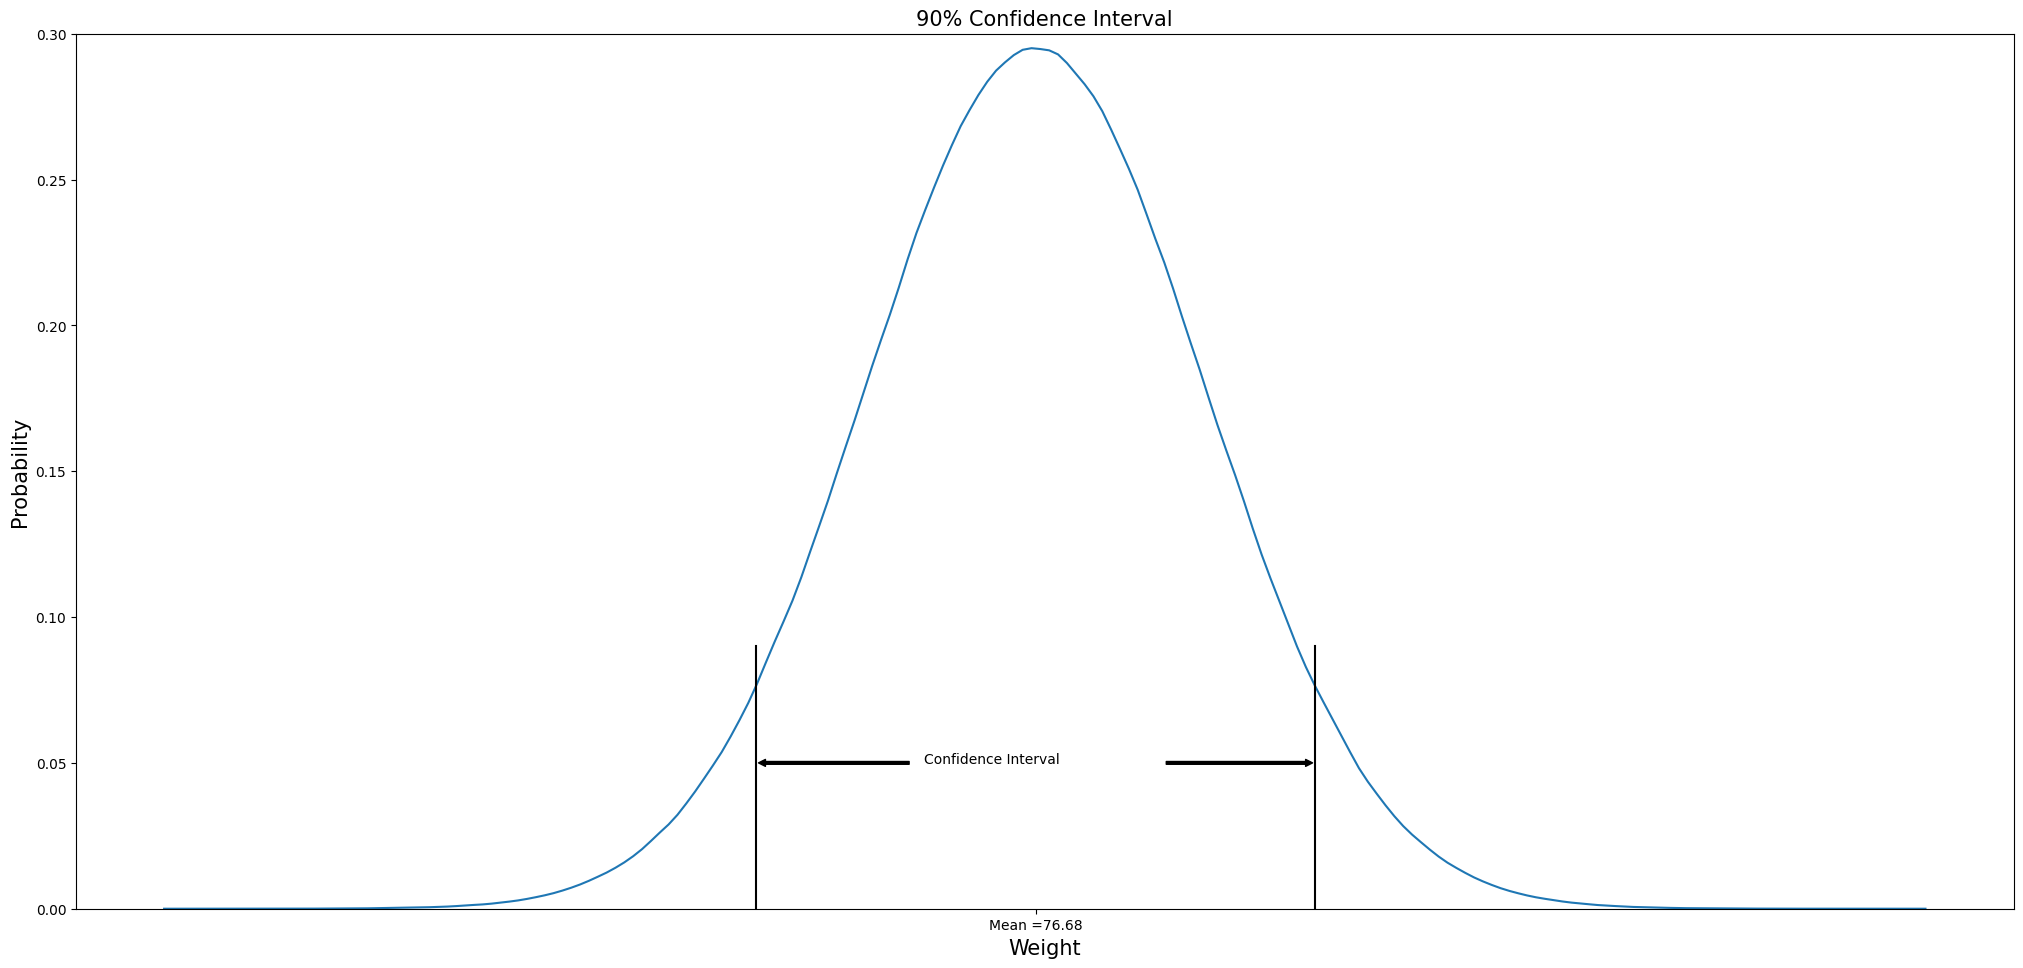

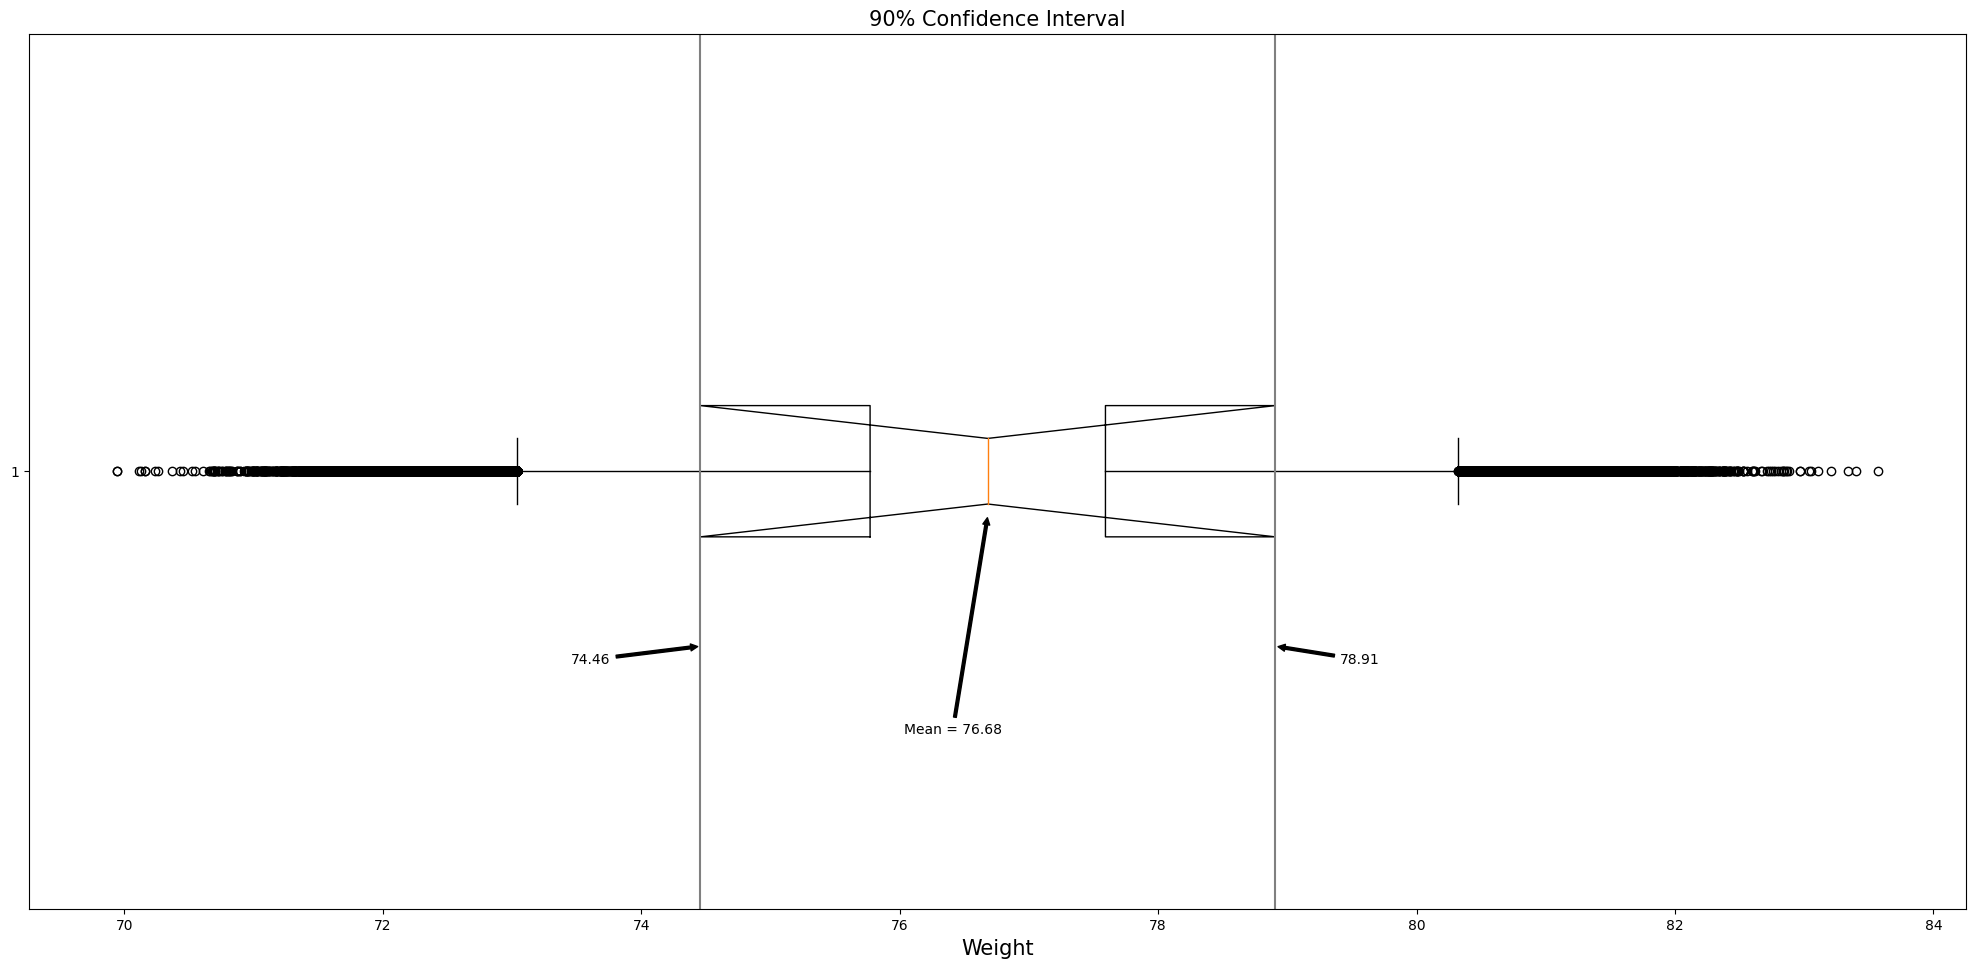

In [27]:
# given sample
weight = [59.1, 65.0, 75.8, 79.2, 95.0, 99.8, 89.1, 65.2, 41.9, 55.2, 94.8, 84.1, 83.2, 74.0, 75.5, 76.2, 79.1, 80.1, 
          92.1, 74.2, 59.2, 64.0, 75, 78.2, 95.6, 97.8, 89.5, 64.2, 41.8, 57.2, 85, 91.4, 81.8, 74.6, 90]

# number of observations in sample
n = len(weight)

# calculate sample mean
samp_mean = np.mean(weight)

# calculate sample standard deviaiton
samp_sd = np.std(weight)

# given population standard deviation 
std_pop = 8

# plot a first subplot
plt.subplot(2, 1, 1)

# consider a random variable 'X' that follows a normal distribution with sample mean and sample standard deviation  
# pass the sample mean to the parameter, 'loc'
# pass the 'std_pop/np.sqrt(n)' to the parameter, 'scale' 
# pass the required number of observations to the parameter, 'size'
# set 'random_state' to obtain the same observations every time you run the code 
X = stats.norm.rvs(loc = samp_mean, scale = std_pop/np.sqrt(n), size = 5000000, random_state = 28)

# plot the distribution of X
# pass the data to the parameter, 'a'
# 'hist=False' does not return the histogram 
# 'cumulative=False' in 'kde_kws' does not return the cumulative kernel density estimator
ax = sns.distplot(a = X, hist = False, kde_kws = dict(cumulative=False))

# set the limit for y-axis
plt.ylim(0, 0.3)

# calculate the 90% confidence interval
# pass the sample mean to the parameter, 'loc'
# pass the scaling factor (std_pop / n^(1/2)) to the parameter, 'scale'
lower_val, upper_val = stats.norm.interval(0.9, loc = samp_mean, scale = std_pop / np.sqrt(n))

# plot a vertical line at lower value of confidence interval
x, y = [lower_val, lower_val], [0, 0.09]
plt.plot(x, y, color = 'black')

# plot a vertical line at upper value of confidence interval
x, y = [upper_val, upper_val], [0, 0.09]
plt.plot(x, y, color = 'black')

# use below code to print the values in the graph
# 'x' and 'y' gives position of the text
# 's' is the text 
plt.text(x = 75.8, y = 0.05, s = 'Confidence Interval')

# use 'annonate' function to draw an arrow between points xy and xytext
# 's' is a argument to write text
# we can change the facecolor and arrowstyle; this is only for representation purpose
plt.annotate(text = '', xy = (lower_val, 0.05), xytext = (75.7, 0.05), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

plt.annotate(text = '', xy = (upper_val, 0.05), xytext = (77.7, 0.05), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

# assign the x-axis labels
# pass the position of labels to the parameter, 'ticks'
# pass the required labels to the parameter, 'labels'
plt.xticks(ticks = [samp_mean], labels = ['Mean =' + str(round(samp_mean,2))])

# set plot and axes labels
# set text size using 'fontsize'
plt.xlabel('Weight', fontsize = 15)
plt.ylabel('Probability', fontsize = 15)
plt.title('90% Confidence Interval', fontsize = 15)

# display the plot
plt.show()


# plot the second subplot
plt.subplot(2, 1, 2)

# plot the boxplot of X
# pass the data to the parameter, 'x'
# to plot a notched boxplot use 'notch=True'
# to plot a horizontal boxplot use 'vert = False'
# overwrite the median value by sample mean using the parameter 'usermedians'
# pass a list of tuple of end points of 90% confidence interval to the parameter 'conf_intervals'
# the notches of the boxplot will be produced at values given to the parameter 'conf_intervals'
plt.boxplot(x = X, notch=True, vert = False, usermedians= [samp_mean], conf_intervals=[(lower_val, upper_val)])

# set the limit for y-axis
plt.ylim(0.5, 1.5)

# plot a vertical line at lower value of confidence interval
x, y = [lower_val, lower_val], [0.5, 1.5]
plt.plot(x, y, color = 'grey')

# plot a vertical line at upper value of confidence interval
x, y = [upper_val, upper_val], [0.5, 1.5]
plt.plot(x, y, color = 'grey')

# use 'annonate' function to draw an arrow between points xy and xytext
# 's' is a argument to write text
# we can change the facecolor and arrowstyle; this is only for representation purpose
plt.annotate(text = round(upper_val, 2), xy = (upper_val, 0.8), xytext = (upper_val+0.5, 0.78), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

plt.annotate(text = round(lower_val, 2), xy = (lower_val, 0.8), xytext = (lower_val-1, 0.78), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

plt.annotate(text = 'Mean = ' + str(round(samp_mean, 2)), xy = (samp_mean, 0.95), xytext = (samp_mean-0.65, 0.7), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

# set plot and axes labels
# set text size using 'fontsize'
plt.xlabel('Weight', fontsize = 15)
plt.title('90% Confidence Interval', fontsize = 15)

# display the plot
plt.show()

The shaded area represents the 90% confidence interval of the population mean.

#### 2. There are 150 apples on a tree. You randomly choose 40 apples and found that the average weight of apples is 182 grams with a standard deviation of 30 grams. Find the 95% confidence interval for the population mean.

In [28]:
# number of observations in the sample
n = 40

# sample mean 
sample_avg = 182

# sample standard deviation
sample_std = 30

# calculate the 95% confidence interval
# pass the sample mean to the parameter, 'loc'
# pass the scaling factor (sample_std / n^(1/2)) to the parameter, 'scale'
# as the population standard deviation is unknown, use the sample standard deviation 
interval = stats.norm.interval(0.95, loc = sample_avg, scale = sample_std/np.sqrt(n))

print('95% confidence interval for population mean is', interval)

95% confidence interval for population mean is (172.70307451543158, 191.29692548456842)


#### 3. A movie production house needs to estimate the average monthly wage of the technical crew members. The previous data shows that the standard deviation of the wages is 190 dollars. The production team thinks that the estimation of the average wage should not exceed 54 dollars. The team has decided to take a small subset of wages for the estimation. Find a suitable number of wages to be considered to get the estimate with 90% confidence.

In [29]:
# calculate sample size using the margin of error

# given population standard deviation
sigma = 190

# required margin of error
ME = 54

# calculate z_alpha_by_2 with alpha = 0.1
# use 'stats.norm.isf()' to find the Z-value corresponding to the upper tail probability 'q'
# pass the value of 'alpha/2' to the parameter 'q'
# use 'round()' to round-off the value to 4 digits
z_alpha_by_2 = np.abs(round(stats.norm.isf(q = 0.1/2), 4))

# calculate sample size (n) 
n = ((z_alpha_by_2)**2)*(sigma**2)/(ME**2)

# round-off the value of 'n' to get the integer value
print('Required Sample Size:', round(n))

Required Sample Size: 33


#### 4. 100 bags of coal were tested and had an average of 35% of ash with a standard deviation of 15%. Calculate the margin of error for a 90% confidence level.

In [30]:
# number of bags
n = 100

# standard deviaion 
std = 0.15

# given confidence level
conf_level = 0.90

# calculate z_alpha_by_2 with alpha = (1-conf_level) = 0.1
# use 'stats.norm.isf()' to find the Z-value corresponding to the upper tail probability 'q'
# pass the value of 'alpha/2' to the parameter 'q'
# use 'round()' to round-off the value to 4 digits
z_alpha_by_2 = np.abs(round(stats.norm.isf(q = 0.1/2), 4))

# calculate margin of error
error = (z_alpha_by_2*std)/ np.sqrt(n)

print('Margin of error:', error)

Margin of error: 0.024673499999999998


#### 5. From a sample of 250 observations, it is found that the average income of a 27 year old Londoner is £45,000 with a sample standard deviation of £4000. Obtain the 95% confidence interval to estimate the average income.

In [31]:
# number of observations in the sample
n = 250

# sample mean 
sample_avg = 45000

# sample standard deviation
sample_std = 4000

# calculate the 95% confidence interval
# pass the sample mean to the parameter, 'loc'
# pass the scaling factor (sample_std / n^(1/2)) to the parameter, 'scale'
# as the population standard deviation is unknown, use the sample standard deviation 
interval = stats.norm.interval(0.95, loc = sample_avg, scale = sample_std/np.sqrt(n))

print('95% confidence interval for average income:', interval)

95% confidence interval for average income: (44504.16397415635, 45495.83602584365)


<a id="small"></a>
### 5.2.2 Small Sample Size

Let us take a sample of `n` observations from the population such that, $n < 30$. Here the standard deviation of the population is unknown. The confidence interval for the population mean with $100(1-\alpha)$% confidence level is given as: $\overline{X} \pm t_{\frac{\alpha}{2}, n-1}\frac{s}{\sqrt{n}}$

Where, <br>
$\overline{X}$: Sample mean<br>
$\alpha$: Level of significance<br>
$s$: Sample standard deviation<br>
$n-1$: degrees of freedom

The ratio $\frac{s}{\sqrt{n}}$ is the estimate of the standard error of the mean. And $t_{\frac{\alpha}{2}, n-1}\frac{s}{\sqrt{n}}$ is the margin of error for the estimate.

The value of $t_{\frac{\alpha}{2}, n-1}$ for different $\alpha$ values can be obtained using the `stats.t.isf()` from the scipy library.  

In [32]:
# let us find the t-values for different alpha values with 10 degrees of freedom

# create an empty dataframe to store the alpha and corresponding t-value
df_t = pd.DataFrame()

# create a dictionary of different alpha values
alpha =  [0.1, 0.05, 0.02, 0.01] 

# use for loop to calculate the t-value for each alpha value
for i in range(len(alpha)):
    alpha_by_2 = alpha[i] / 2
    
    # use 'stats.t.isf()' to find the t-value corresponding to the upper tail probability 'q'
    # pass the value of 'alpha_by_2' to the parameter 'q'
    # pass the 10 degrees of freedom to the parametr 'df' 
    # use 'round()' to round-off the value to 2 digits
    t = np.abs(round(stats.t.isf(q = alpha_by_2, df = 10), 2))

    # create a dataframe using dictionary to store the alpha and corresponding t-value 
    # set the loop iterator 'i' as the index of the dataframe
    row =  pd.DataFrame({"alpha": alpha[i], "t_alpha_by_2": t}, index = [i])

    # append the row to the dataframe 'df_t'
    df_t = df_t.append(row)

# print the final dataframe
df_t

,alpha,t_alpha_by_2
0,0.10,1.81
1,0.05,2.23
2,0.02,2.76
3,0.01,3.17


### Example:

#### 1. There are 150 apples on a tree. You randomly choose 17 apples and found that the average weight of apples is 78 grams with a standard deviation of 23 grams. Find the 90% confidence interval for the population mean.

In [33]:
# number of observations in the sample
n = 17

# sample mean 
sample_avg = 78

# sample standard deviation
sample_std = 23

# calculate the 90% confidence interval for the population mean
# pass the 'n-1' degrees of freedom to the parameter, 'df' 
# pass the sample mean to the parameter, 'loc'
# pass the scaling factor (sample_std / n^(1/2)) to the parameter, 'scale'
# as the population standard deviation is unknown, use the sample standard deviation 
interval = stats.t.interval(0.90, df = n-1, loc = sample_avg, scale = sample_std/np.sqrt(n))

print('90% confidence interval for population mean is', interval)

90% confidence interval for population mean is (68.26090326067306, 87.73909673932694)


<a id="prop"></a>
## 5.3 Interval Estimation for Proportion

Consider a population in which each observation is either a success or a failure. The population proportion is denoted by `P` which the ratio of the number of successes to the size of the population.

The confidence interval for the population proportion with $100(1-\alpha)$% confidence level is given as: $p \pm Z_{\frac{\alpha}{2}}\sqrt{\frac{p(1 - p)}{n}}$

Where, <br>
$p$: Sample proportion<br>
$\alpha$: Level of significance<br>
$n$: Sample size

The quantity $Z_{\frac{\alpha}{2}}\sqrt{\frac{p(1 - p)}{n}}$ is the margin of error.

### Example:

#### 1. A financial firm has created 50 portfolios. From them, a sample of 13 portfolios was selected, out of which 8 were found to be underperforming. Construct a 99% confidence interval to estimate the population proportion.

In [34]:
# total count of portfolios
N = 50

# number of portfolios in a sample
n = 13

# number of underperforming portfolios in a sample
x = 8

# sample proportion
p_samp = x/n

# calculate the 99% confidence interval
# pass the sample proportion to the parameter, 'loc'
# pass the scaling factor ((p_samp*(1-p_samp))/n))^0.5) to the parameter, 'scale'
interval = stats.norm.interval(0.99, loc = p_samp, scale = np.sqrt((p_samp*(1-p_samp))/n))

print('99% confidence interval for population proportion is', interval)

99% confidence interval for population proportion is (0.26782280814713805, 0.9629464226220927)
